In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
import warnings
%matplotlib inline
import seaborn as sns

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/airbnb-listings_80000.csv",nrows=55000,index_col="Unnamed: 0")

In [3]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,1002049,https://www.airbnb.com/rooms/1002049,20170407214050,2017-04-08,Central room with private balcony!,Nice and bright room with balcony,"ABOUT ROOM This is a comfortable, modern and b...",Nice and bright room with balcony ABOUT ROOM T...,none,"Raval neighborhood is colorful,with a real mix...",...,8.0,9.0,8.0,NaN,NaN,strict,1.0,3.36,"41.3789215699,2.1705193594","Host Has Profile Pic,Host Identity Verified,Is..."
1,16091999,https://www.airbnb.com/rooms/16091999,20170407214050,2017-04-08,Amazing apartment in the heart of Barcelona,The apartment is verycloseby main attactions i...,NaN,The apartment is verycloseby main attactions i...,none,NaN,...,9.0,9.0,9.0,NaN,NaN,flexible,2.0,3.33,"41.3795617766,2.16543246528","Host Has Profile Pic,Is Location Exact,Require..."
2,10371528,https://www.airbnb.com/rooms/10371528,20170407214050,2017-04-08,Penthouse loft with terrace & views,Modern Penthouse loft room with views over the...,The apartment is actually a two floor duplex w...,Modern Penthouse loft room with views over the...,none,"The Raval is right in the middle of the city, ...",...,10.0,9.0,9.0,NaN,NaN,strict,1.0,4.42,"41.3760715648,2.17030365419","Host Has Profile Pic,Host Identity Verified,Is..."
3,1459427,https://www.airbnb.com/rooms/1459427,20170407214050,2017-04-08,"habitacion en barcelona ""Tokyo""",tokyo es una habitacion muy tranquila en el co...,"La habitacion ""Tokio""es comoda,tranquila y sup...",tokyo es una habitacion muy tranquila en el co...,none,NaN,...,10.0,10.0,8.0,NaN,NaN,strict,3.0,0.38,"41.3794169615,2.16603022914",Requires License
4,4732958,https://www.airbnb.com/rooms/4732958,20170407214050,2017-04-08,GORGEOUS DESIGN FLAT IN HEART 3A,Thanks for checking our apartment out. As exp...,"Welcome to Barcelona, the city where culture, ...",Thanks for checking our apartment out. As exp...,none,El Raval is a neighbourhood in the Ciutat Vell...,...,9.0,9.0,9.0,NaN,NaN,flexible,13.0,4.23,"41.3810882381,2.16690046585","Host Has Profile Pic,Host Identity Verified,Re..."


In [4]:
df.shape

(55000, 89)

In [7]:
df.columns[46:91]

Index(['Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price',
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Has Availability', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Calendar last Scraped', 'Number of Reviews', 'First Review',
       'Last Review', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features'],
      dtype='object')

In [6]:
df.columns[0:46]

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude'],
      dtype='object')

In [8]:
dfl=df[['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name',
       'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
       'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since',
       'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url',
       'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code']]

In [9]:
dfr=df[['Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet',
       'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Calendar Updated', 'Has Availability',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Calendar last Scraped', 'Number of Reviews',
       'First Review', 'Last Review', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'License',
       'Jurisdiction Names', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'Geolocation',
       'Features']]

In [10]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55000 entries, 0 to 54999
Data columns (total 44 columns):
ID                              55000 non-null int64
Listing Url                     55000 non-null object
Scrape ID                       55000 non-null int64
Last Scraped                    55000 non-null object
Name                            54947 non-null object
Summary                         53147 non-null object
Space                           38722 non-null object
Description                     54976 non-null object
Experiences Offered             55000 non-null object
Neighborhood Overview           32543 non-null object
Notes                           21978 non-null object
Transit                         33786 non-null object
Access                          30052 non-null object
Interaction                     28722 non-null object
House Rules                     33332 non-null object
Thumbnail Url                   44408 non-null object
Medium Url                   

In [9]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55000 entries, 0 to 54999
Data columns (total 44 columns):
Latitude                          55000 non-null float64
Longitude                         55000 non-null float64
Property Type                     55000 non-null object
Room Type                         55000 non-null object
Accommodates                      54989 non-null float64
Bathrooms                         54829 non-null float64
Bedrooms                          54937 non-null float64
Beds                              54896 non-null float64
Bed Type                          55000 non-null object
Amenities                         54513 non-null object
Square Feet                       1417 non-null float64
Price                             54228 non-null float64
Weekly Price                      10928 non-null float64
Monthly Price                     10641 non-null float64
Security Deposit                  23143 non-null float64
Cleaning Fee                      35252 n

In [11]:
dfl.isnull().sum()

ID                                  0
Listing Url                         0
Scrape ID                           0
Last Scraped                        0
Name                               53
Summary                          1853
Space                           16278
Description                        24
Experiences Offered                 0
Neighborhood Overview           22457
Notes                           33022
Transit                         21214
Access                          24948
Interaction                     26278
House Rules                     21668
Thumbnail Url                   10592
Medium Url                      10592
Picture Url                        61
XL Picture Url                  10592
Host ID                             0
Host URL                            0
Host Name                          52
Host Since                         52
Host Location                     257
Host About                      21823
Host Response Time              12610
Host Respons

In [12]:
dfr.isnull().sum()

Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                         11
Bathrooms                           171
Bedrooms                             63
Beds                                104
Bed Type                              0
Amenities                           487
Square Feet                       53583
Price                               772
Weekly Price                      44072
Monthly Price                     44359
Security Deposit                  31857
Cleaning Fee                      19748
Guests Included                       0
Extra People                          3
Minimum Nights                        0
Maximum Nights                        0
Calendar Updated                      0
Has Availability                  54043
Availability 30                       0
Availability 60                       0
Availability 90                       0


In [13]:
dfr.columns[dfr.isnull().sum()>10000]

Index(['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit',
       'Cleaning Fee', 'Has Availability', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
       'Reviews per Month'],
      dtype='object')

In [14]:
dfr.columns[dfr.isnull().any()==False]

Index(['Latitude', 'Longitude', 'Property Type', 'Room Type', 'Bed Type',
       'Guests Included', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'Cancellation Policy', 'Geolocation'],
      dtype='object')

In [15]:
dfr1=dfr[['Latitude', 'Longitude', 'Property Type', 'Room Type', 'Bed Type',
       'Guests Included', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'Cancellation Policy', 'Geolocation','Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities','Price','Extra People','First Review', 'Last Review', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value','Calculated host listings count',
       'Reviews per Month', 'Features']]

In [16]:
dfr1.isnull().sum()

Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Bed Type                              0
Guests Included                       0
Minimum Nights                        0
Maximum Nights                        0
Calendar Updated                      0
Availability 30                       0
Availability 60                       0
Availability 90                       0
Availability 365                      0
Calendar last Scraped                 0
Number of Reviews                     0
Cancellation Policy                   0
Geolocation                           0
Accommodates                         11
Bathrooms                           171
Bedrooms                             63
Beds                                104
Amenities                           487
Price                               772
Extra People                          3
First Review                      13500


In [17]:
dfl.columns[dfl.isnull().any()==False]

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Experiences Offered',
       'Host ID', 'Host URL', 'Street', 'Neighbourhood Cleansed',
       'Smart Location', 'Country Code'],
      dtype='object')

In [18]:
dfl1=dfl[['ID', 'Listing Url', 'Scrape ID', 'Last Scraped',
       'Experiences Offered', 'Host ID', 'Host URL', 'Street',
       'Neighbourhood Cleansed', 'Smart Location', 'Country Code','Name', 'Summary', 'Space', 'Description','Host Name', 'Host Since', 'Host Location','Host Response Time', 
 'Host Response Rate','Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'Neighbourhood','City', 'State', 'Zipcode', 'Market']]

In [19]:
dfl1.isnull().sum()

ID                               0
Listing Url                      0
Scrape ID                        0
Last Scraped                     0
Experiences Offered              0
Host ID                          0
Host URL                         0
Street                           0
Neighbourhood Cleansed           0
Smart Location                   0
Country Code                     0
Name                            53
Summary                       1853
Space                        16278
Description                     24
Host Name                       52
Host Since                      52
Host Location                  257
Host Response Time           12610
Host Response Rate           12610
Host Listings Count             52
Host Total Listings Count       52
Host Verifications              32
Neighbourhood                16867
City                            54
State                         5307
Zipcode                       2127
Market                         653
dtype: int64

In [20]:
dfl1.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count
count,5.500000e+04,5.500000e+04,5.500000e+04,42390.000000,54948.000000,54948.000000
mean,9.847568e+06,2.016940e+13,3.222520e+07,93.590729,9.110887,9.110887
std,5.421658e+06,3.151723e+09,3.168689e+07,17.267633,53.173999,53.173999
min,5.900000e+02,2.015101e+13,6.780000e+02,0.000000,0.000000,0.000000
25%,5.287578e+06,2.017031e+13,6.808380e+06,98.000000,1.000000,1.000000
50%,1.008249e+07,2.017040e+13,2.170232e+07,100.000000,1.000000,1.000000
75%,1.461343e+07,2.017050e+13,4.801345e+07,100.000000,3.000000,3.000000
max,1.928376e+07,2.017062e+13,1.348208e+08,100.000000,959.000000,959.000000


In [21]:
dfl1.describe(include="all")

,ID,Listing Url,Scrape ID,Last Scraped,Experiences Offered,Host ID,Host URL,Street,Neighbourhood Cleansed,Smart Location,...,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood,City,State,Zipcode,Market
count,5.500000e+04,55000,5.500000e+04,55000,55000,5.500000e+04,55000,55000,55000,55000,...,42390,42390.000000,54948.000000,54948.000000,54968,38133,54946,49693,52873,54347
unique,NaN,55000,NaN,47,5,NaN,49743,22001,1932,2045,...,4,NaN,NaN,NaN,541,1886,1917,514,11391,76
top,NaN,https://www.airbnb.com/rooms/10795955,NaN,2017-05-09,none,NaN,https://www.airbnb.com/users/show/3625030,"Montmartre, Paris, Île-de-France 75018, France",I Centro Storico,"Paris, France",...,within an hour,NaN,NaN,NaN,"email,phone,reviews,jumio",Oud-West,Paris,Île-de-France,75018,Paris
freq,NaN,1,NaN,4952,54642,NaN,72,364,1242,5798,...,22500,NaN,NaN,NaN,11973,437,5800,5876,788,5999
mean,9.847568e+06,NaN,2.016940e+13,NaN,NaN,3.222520e+07,NaN,NaN,NaN,NaN,...,NaN,93.590729,9.110887,9.110887,NaN,NaN,NaN,NaN,NaN,NaN
std,5.421658e+06,NaN,3.151723e+09,NaN,NaN,3.168689e+07,NaN,NaN,NaN,NaN,...,NaN,17.267633,53.173999,53.173999,NaN,NaN,NaN,NaN,NaN,NaN
min,5.900000e+02,NaN,2.015101e+13,NaN,NaN,6.780000e+02,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.287578e+06,NaN,2.017031e+13,NaN,NaN,6.808380e+06,NaN,NaN,NaN,NaN,...,NaN,98.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.008249e+07,NaN,2.017040e+13,NaN,NaN,2.170232e+07,NaN,NaN,NaN,NaN,...,NaN,100.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.461343e+07,NaN,2.017050e+13,NaN,NaN,4.801345e+07,NaN,NaN,NaN,NaN,...,NaN,100.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
dfr1.describe()

,Latitude,Longitude,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,...,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,55000.000000,55000.000000,55000.000000,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,...,54997.000000,40924.000000,40819.000000,40852.000000,40773.000000,40835.000000,40778.000000,40766.000000,54900.000000,41500.000000
mean,37.879818,-14.900100,1.563764,3.257091,2.750535e+05,9.871618,22.810127,37.694982,165.941291,17.236764,...,11.482972,92.842635,9.525956,9.315847,9.687882,9.705645,9.468390,9.311706,6.541202,1.500887
std,22.665962,69.803644,1.240278,18.994986,2.422581e+07,10.913809,22.269001,33.708605,140.322461,33.582699,...,28.833438,8.503633,0.852881,1.049083,0.730178,0.721928,0.797244,0.905523,38.872019,1.837309
min,-38.190541,-123.211214,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,37.980076,-73.968358,1.000000,1.000000,3.100000e+01,0.000000,0.000000,0.000000,15.000000,1.000000,...,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.320000
50%,41.904717,2.158994,1.000000,2.000000,1.125000e+03,5.000000,16.000000,32.000000,148.000000,4.000000,...,0.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.890000
75%,51.219003,6.203622,2.000000,3.000000,1.125000e+03,19.000000,43.000000,70.000000,313.000000,18.000000,...,15.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.060000
max,55.990831,153.621690,20.000000,3888.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,735.000000,...,999.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000,125.920000


In [23]:
dfr1.describe(include="all")

,Latitude,Longitude,Property Type,Room Type,Bed Type,Guests Included,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,Features
count,55000.000000,55000.000000,55000,55000,55000,55000.000000,55000.000000,5.500000e+04,55000,55000.000000,...,40924.000000,40819.000000,40852.000000,40773.000000,40835.000000,40778.000000,40766.000000,54900.000000,41500.000000,54964
unique,NaN,NaN,35,3,5,NaN,NaN,NaN,72,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118
top,NaN,NaN,Apartment,Entire home/apt,Real Bed,NaN,NaN,NaN,today,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Host Has Profile Pic,Host Identity Verified,Is..."
freq,NaN,NaN,39020,35127,53182,NaN,NaN,NaN,10446,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13997
mean,37.879818,-14.900100,NaN,NaN,NaN,1.563764,3.257091,2.750535e+05,NaN,9.871618,...,92.842635,9.525956,9.315847,9.687882,9.705645,9.468390,9.311706,6.541202,1.500887,NaN
std,22.665962,69.803644,NaN,NaN,NaN,1.240278,18.994986,2.422581e+07,NaN,10.913809,...,8.503633,0.852881,1.049083,0.730178,0.721928,0.797244,0.905523,38.872019,1.837309,NaN
min,-38.190541,-123.211214,NaN,NaN,NaN,0.000000,1.000000,1.000000e+00,NaN,0.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000,NaN
25%,37.980076,-73.968358,NaN,NaN,NaN,1.000000,1.000000,3.100000e+01,NaN,0.000000,...,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.320000,NaN
50%,41.904717,2.158994,NaN,NaN,NaN,1.000000,2.000000,1.125000e+03,NaN,5.000000,...,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.890000,NaN
75%,51.219003,6.203622,NaN,NaN,NaN,2.000000,3.000000,1.125000e+03,NaN,19.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.060000,NaN


#### Latitude	Longitude	Guests Included	Minimum Nights	Maximum Nights	Availability 30	Availability 60	Availability 90	Availability 365	Number of Reviews	...	Extra People	Review Scores Rating	Review Scores Accuracy	Review Scores Cleanliness	Review Scores Checkin	Review Scores Communication	Review Scores Location	Review Scores Value	Calculated host listings count	Reviews per Month
#### ID	Scrape ID	Host ID	Host Response Rate	Host Listings Count	Host Total Listings Count

In [24]:
#import pandas_profiling as pp

In [25]:
#report1=pp.ProfileReport(df)

In [26]:
#report1

In [27]:
#report2=pp.ProfileReport(dfl1)
#report2

In [28]:
#report3=pp.ProfileReport(dfr1)
#report3

In [29]:
#report1.to_file("C:/Users/Lenovo/Downloads/report1.html")

In [30]:
#report2.to_file("C:/Users/Lenovo/Downloads/report2.html")

In [31]:
#report3.to_file("C:/Users/Lenovo/Downloads/report3.html")

In [32]:
dfl1.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Experiences Offered',
       'Host ID', 'Host URL', 'Street', 'Neighbourhood Cleansed',
       'Smart Location', 'Country Code', 'Name', 'Summary', 'Space',
       'Description', 'Host Name', 'Host Since', 'Host Location',
       'Host Response Time', 'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Neighbourhood',
       'City', 'State', 'Zipcode', 'Market'],
      dtype='object')

In [33]:
dfr1.columns

Index(['Latitude', 'Longitude', 'Property Type', 'Room Type', 'Bed Type',
       'Guests Included', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'Cancellation Policy', 'Geolocation',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Price',
       'Extra People', 'First Review', 'Last Review', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value',
       'Calculated host listings count', 'Reviews per Month', 'Features'],
      dtype='object')

In [34]:
#,Host_Verifications
#Listing_Url

In [35]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [36]:
['Listing Url','Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features']

['Listing Url',
 'Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House Rules',
 'Thumbnail Url',
 'Medium Url',
 'Picture Url',
 'XL Picture Url',
 'Host ID',
 'Host URL',
 'Host Name',
 'Host Since',
 'Host Location',
 'Host About',
 'Host Response Time',
 'Host Response Rate',
 'Host Acceptance Rate',
 'Host Thumbnail Url',
 'Host Picture Url',
 'Host Neighbourhood',
 'Host Listings Count',
 'Host Total Listings Count',
 'Host Verifications',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Smart Location',
 'Country Code',
 'Country',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Weekly Price',
 'Monthly Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Has Avai

In [52]:
dff=df[['Listing Url','Experiences Offered','Host ID', 'Host URL', 'Street', 'Neighbourhood Cleansed',
       'Smart Location', 'Country Code','Host Location','Host Response Time', 'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Neighbourhood',
       'City', 'State', 'Zipcode', 'Market','Property Type', 'Room Type', 'Bed Type',
       'Guests Included', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365',  'Number of Reviews', 'Cancellation Policy',
        'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds','Price',
       'Extra People','Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value',
       'Calculated host listings count']]

In [53]:
dff.shape

(55000, 46)

In [54]:
cp1=dff[["City","Market","Zipcode","State"]]
cp1.head()

,City,Market,Zipcode,State
0,Barcelona,Barcelona,08001,Catalonia
1,Barcelona,Barcelona,08001,Catalunya
2,Barcelona,Barcelona,08001,Catalunya
3,Barcelona,Barcelona,08001,Catalonia
4,Barcelona,Barcelona,08002,Catalonia


In [55]:
dff.isnull().sum()

Listing Url                           0
Experiences Offered                   0
Host ID                               0
Host URL                              0
Street                                0
Neighbourhood Cleansed                0
Smart Location                        0
Country Code                          0
Host Location                       257
Host Response Time                12610
Host Response Rate                12610
Host Listings Count                  52
Host Total Listings Count            52
Host Verifications                   32
Neighbourhood                     16867
City                                 54
State                              5307
Zipcode                            2127
Market                              653
Property Type                         0
Room Type                             0
Bed Type                              0
Guests Included                       0
Minimum Nights                        0
Maximum Nights                        0


In [56]:
#cp1.head()
print(cp1.head())
print("\n")
print(cp1.isnull().sum())

        City     Market Zipcode      State
0  Barcelona  Barcelona   08001  Catalonia
1  Barcelona  Barcelona   08001  Catalunya
2  Barcelona  Barcelona   08001  Catalunya
3  Barcelona  Barcelona   08001  Catalonia
4  Barcelona  Barcelona   08002  Catalonia


City         54
Market      653
Zipcode    2127
State      5307
dtype: int64


In [57]:
cp2=dff[['Availability 30', 'Availability 60','Availability 90', 'Availability 365']]
print(cp2.head())
print("\n")
print(cp2.isnull().sum())

   Availability 30  Availability 60  Availability 90  Availability 365
0                4               17               41               229
1                2                8               27               212
2                6                9               13               201
3               20               47               77               352
4                5               14               35               192


Availability 30     0
Availability 60     0
Availability 90     0
Availability 365    0
dtype: int64


In [58]:
cp3=dff[['Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value']]
cp3.head()
print(cp3.head())
print("\n")
print(cp3.isnull().sum())

   Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
0                  78.0                     9.0                        8.0   
1                  87.0                    10.0                        9.0   
2                  96.0                    10.0                        9.0   
3                  83.0                     9.0                        8.0   
4                  84.0                     9.0                        9.0   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                    8.0                          8.0                     9.0   
1                    9.0                          9.0                     9.0   
2                   10.0                         10.0                     9.0   
3                    9.0                         10.0                    10.0   
4                    9.0                          9.0                     9.0   

   Review Scores Value  
0                  

In [118]:
dff1=dff.dropna(subset=["Price"])

In [119]:
dff1.shape

(54228, 46)

In [120]:
cp4=dff[['Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value']]
cp4.head()
print(cp4.head())
print("\n")
print(cp4.isnull().sum())

   Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
0                  78.0                     9.0                        8.0   
1                  87.0                    10.0                        9.0   
2                  96.0                    10.0                        9.0   
3                  83.0                     9.0                        8.0   
4                  84.0                     9.0                        9.0   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                    8.0                          8.0                     9.0   
1                    9.0                          9.0                     9.0   
2                   10.0                         10.0                     9.0   
3                    9.0                         10.0                    10.0   
4                    9.0                          9.0                     9.0   

   Review Scores Value  
0                  

In [121]:
dff1.describe()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
count,5.422800e+04,41850.000000,54176.000000,54176.000000,54228.000000,54228.000000,5.422800e+04,54228.000000,54228.000000,54228.000000,...,54228.00000,54226.000000,40498.000000,40393.000000,40426.000000,40349.000000,40409.000000,40354.000000,40343.000000,54128.000000
mean,3.223645e+07,93.633501,9.134321,9.134321,1.555709,3.248045,2.789580e+05,9.834864,22.756251,37.654846,...,134.76916,10.912736,92.820065,9.525091,9.314600,9.687229,9.705016,9.466497,9.311553,6.570426
std,3.168450e+07,17.182460,53.416755,53.416755,1.217740,19.000103,2.439762e+07,10.890727,22.231803,33.659669,...,143.40306,25.525469,8.516716,0.853250,1.050522,0.730940,0.722886,0.798066,0.906177,39.117312
min,9.330000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,...,0.00000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,6.828812e+06,99.000000,1.000000,1.000000,1.000000,1.000000,3.100000e+01,0.000000,0.000000,0.000000,...,55.00000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000
50%,2.173294e+07,100.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,5.000000,16.000000,32.000000,...,90.00000,0.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000
75%,4.801362e+07,100.000000,3.000000,3.000000,2.000000,3.000000,1.125000e+03,19.000000,43.000000,70.000000,...,150.00000,15.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000
max,1.348208e+08,100.000000,959.000000,959.000000,20.000000,3888.000000,2.147484e+09,30.000000,60.000000,90.000000,...,999.00000,999.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000


In [122]:
dff1.describe(include="all")

,Listing Url,Experiences Offered,Host ID,Host URL,Street,Neighbourhood Cleansed,Smart Location,Country Code,Host Location,Host Response Time,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
count,54228,54228,5.422800e+04,54228,54228,54228,54228,54228,53975,41850,...,54228.00000,54226.000000,40498.000000,40393.000000,40426.000000,40349.000000,40409.000000,40354.000000,40343.000000,54128.000000
unique,54228,5,NaN,49057,21716,1930,2025,19,3160,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,https://www.airbnb.com/rooms/10795955,none,NaN,https://www.airbnb.com/users/show/3625030,"Montmartre, Paris, Île-de-France 75018, France",I Centro Storico,"Paris, France",US,"Paris, Île-de-France, France",within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,53870,NaN,72,364,1242,5795,14449,4757,22271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.223645e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134.76916,10.912736,92.820065,9.525091,9.314600,9.687229,9.705016,9.466497,9.311553,6.570426
std,NaN,NaN,3.168450e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,143.40306,25.525469,8.516716,0.853250,1.050522,0.730940,0.722886,0.798066,0.906177,39.117312
min,NaN,NaN,9.330000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,NaN,NaN,6.828812e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.00000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000
50%,NaN,NaN,2.173294e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.00000,0.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000
75%,NaN,NaN,4.801362e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.00000,15.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


In [123]:
dff1.columns

Index(['Listing Url', 'Experiences Offered', 'Host ID', 'Host URL', 'Street',
       'Neighbourhood Cleansed', 'Smart Location', 'Country Code',
       'Host Location', 'Host Response Time', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'Neighbourhood', 'City', 'State', 'Zipcode',
       'Market', 'Property Type', 'Room Type', 'Bed Type', 'Guests Included',
       'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Cancellation Policy',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Extra People', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count'],
      dtype='object')

In [124]:
dff1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54228 entries, 0 to 54999
Data columns (total 46 columns):
Listing Url                       54228 non-null object
Experiences Offered               54228 non-null object
Host ID                           54228 non-null int64
Host URL                          54228 non-null object
Street                            54228 non-null object
Neighbourhood Cleansed            54228 non-null object
Smart Location                    54228 non-null object
Country Code                      54228 non-null object
Host Location                     53975 non-null object
Host Response Time                41850 non-null object
Host Response Rate                41850 non-null float64
Host Listings Count               54176 non-null float64
Host Total Listings Count         54176 non-null float64
Host Verifications                54198 non-null object
Neighbourhood                     37558 non-null object
City                              54179 non-null 

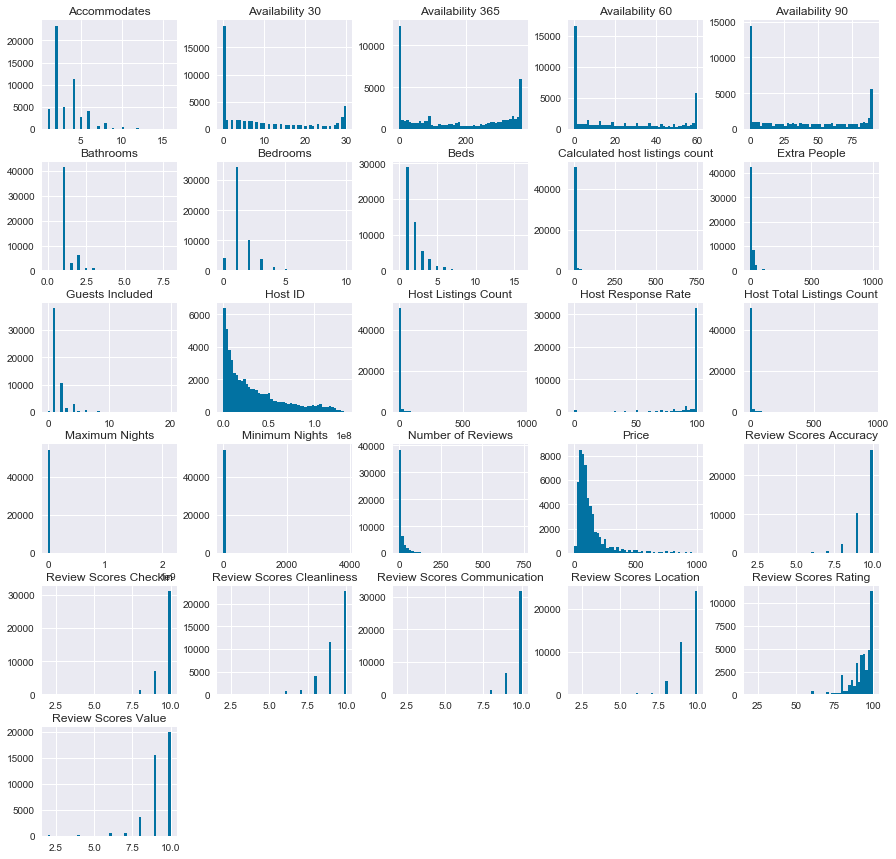

In [125]:
dff1.hist(bins=50,figsize=(15,15))
plt.show()

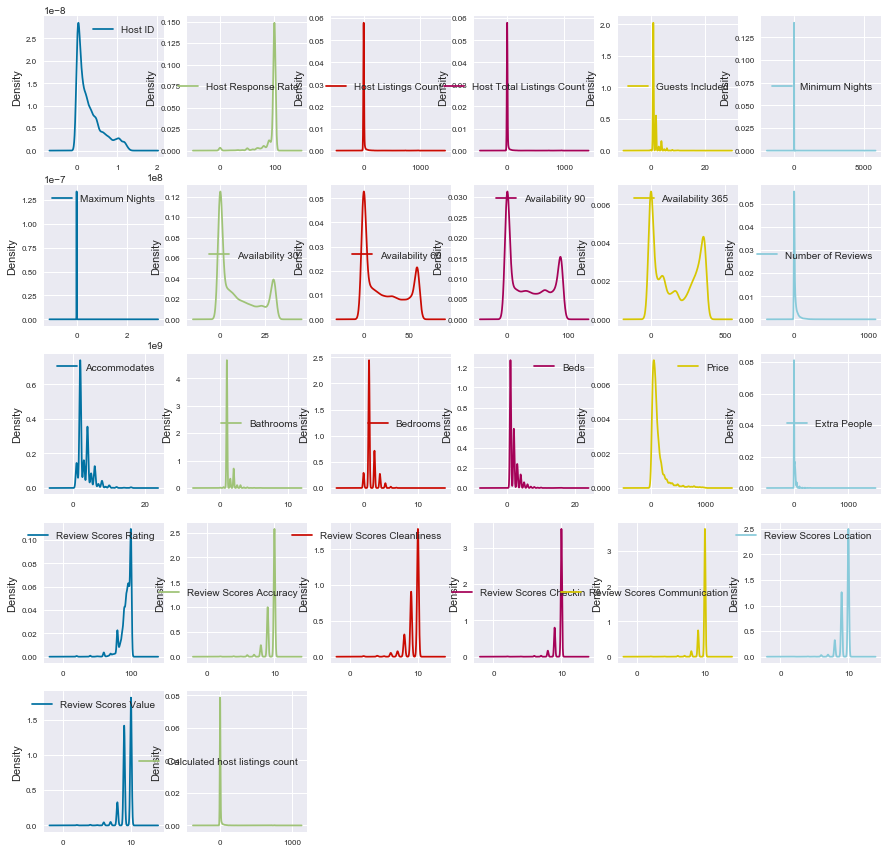

In [126]:
dff1.plot(kind='density', subplots=True, layout=(5,6), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

In [127]:
["Listing Url","Experiences Offered","Host URL","Street,Neighbourhood Cleansed",
"Smart Location","Country Code","Host Location","Host Response Time"] 

['Listing Url',
 'Experiences Offered',
 'Host URL',
 'Street,Neighbourhood Cleansed',
 'Smart Location',
 'Country Code',
 'Host Location',
 'Host Response Time']

In [128]:
#SPLITING NUMERICAL NAD CATEGORICAL VARIABLE:
a=list(dff1.dtypes=="object")
b=list(dff1.columns)
cat_columns=[]
num_columns=[]
for i in range(len(list(dff1.columns))):
    if a[i]==True:
        cat_columns.append(b[i])
    else:
        num_columns.append(b[i])
        
print("CATEGORICAL VAR:",cat_columns)
print("\nNUMERICAL VAR:",num_columns)

CATEGORICAL VAR: ['Listing Url', 'Experiences Offered', 'Host URL', 'Street', 'Neighbourhood Cleansed', 'Smart Location', 'Country Code', 'Host Location', 'Host Response Time', 'Host Verifications', 'Neighbourhood', 'City', 'State', 'Zipcode', 'Market', 'Property Type', 'Room Type', 'Bed Type', 'Calendar Updated', 'Cancellation Policy']

NUMERICAL VAR: ['Host ID', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count', 'Guests Included', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Extra People', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Calculated host listings count']


In [129]:
# unique values of categorical varaible having less than 200
unique_cat=[]
for i in range(len(l)):
    if len(dff[l[i]].unique())<200:
        print("unique values:",l[i],"is",dff1[l[i]].unique())
        print("\n")
        unique_cat.append(l[i])

NameError: name 'l' is not defined

In [ ]:
unique_cat

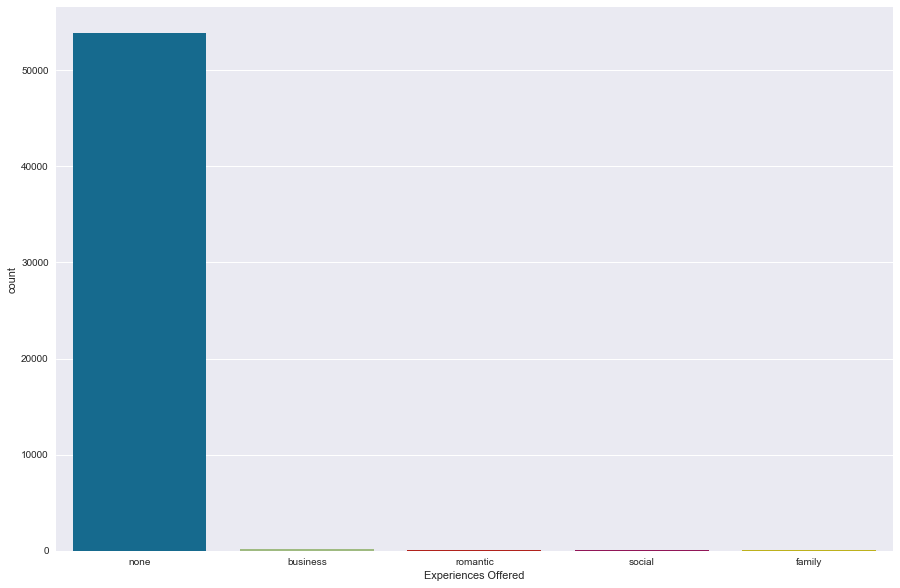

In [130]:
plt.figure(figsize=(15,10))
sns.countplot(x = dff1["Experiences Offered"])
plt.show()

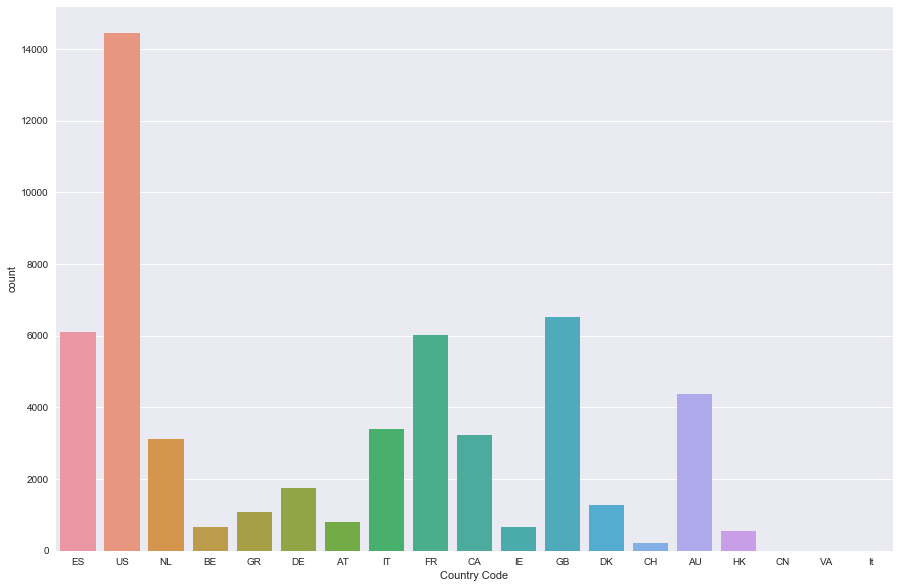

In [131]:
plt.figure(figsize=(15,10))
sns.countplot(x = dff1["Country Code"])
plt.show()

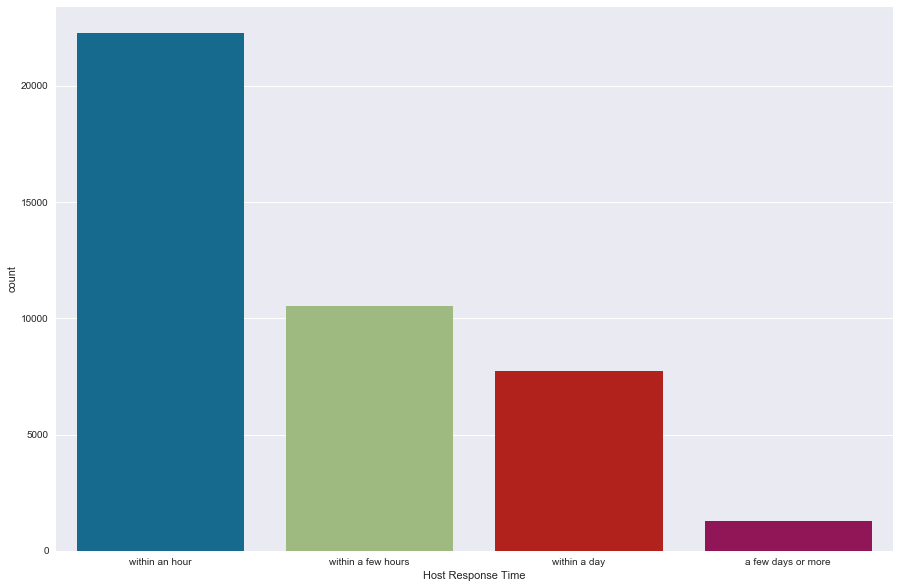

In [132]:
plt.figure(figsize=(15,10))
sns.countplot(x = dff1["Host Response Time"])
plt.show()

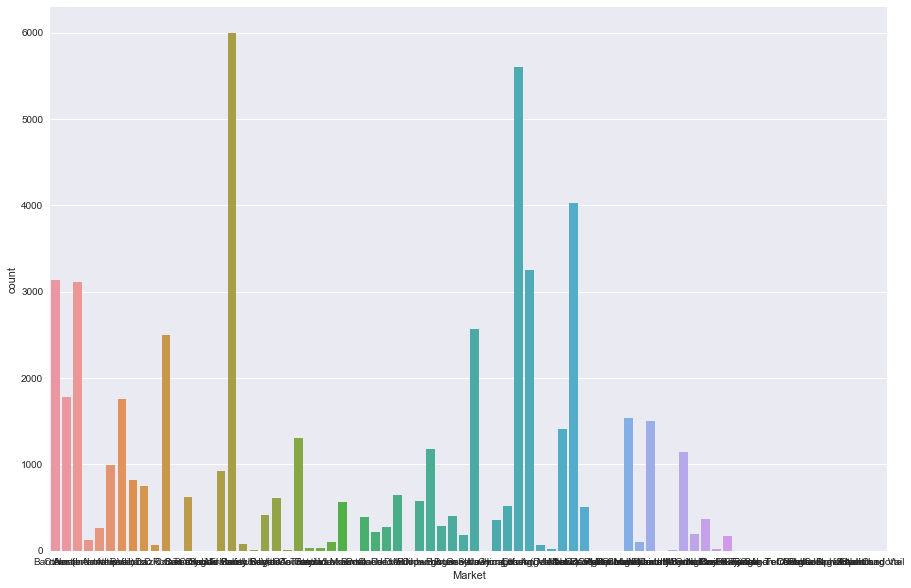

In [133]:
plt.figure(figsize=(15,10))
sns.countplot(x = dff1["Market"])
plt.show()

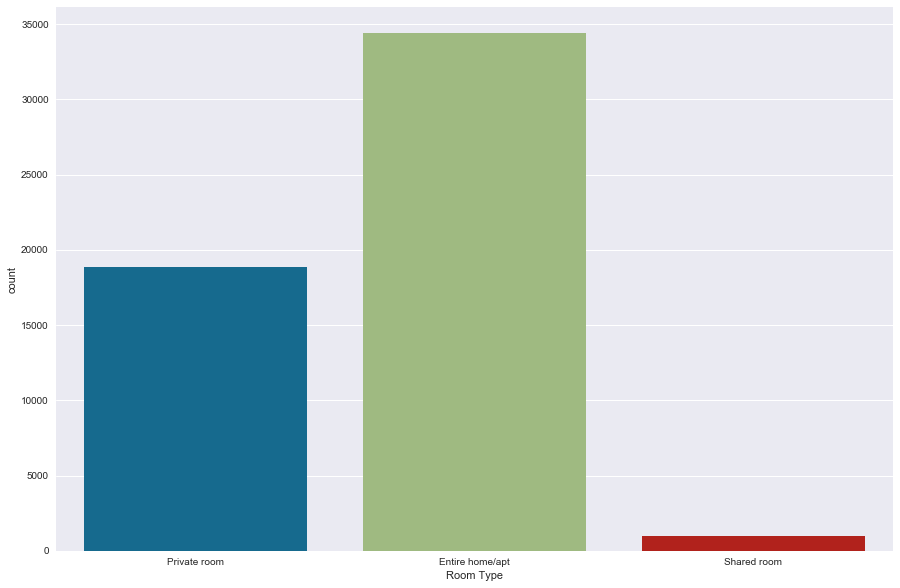

In [134]:
plt.figure(figsize=(15,10))
sns.countplot(x = dff1["Room Type"])
plt.show()

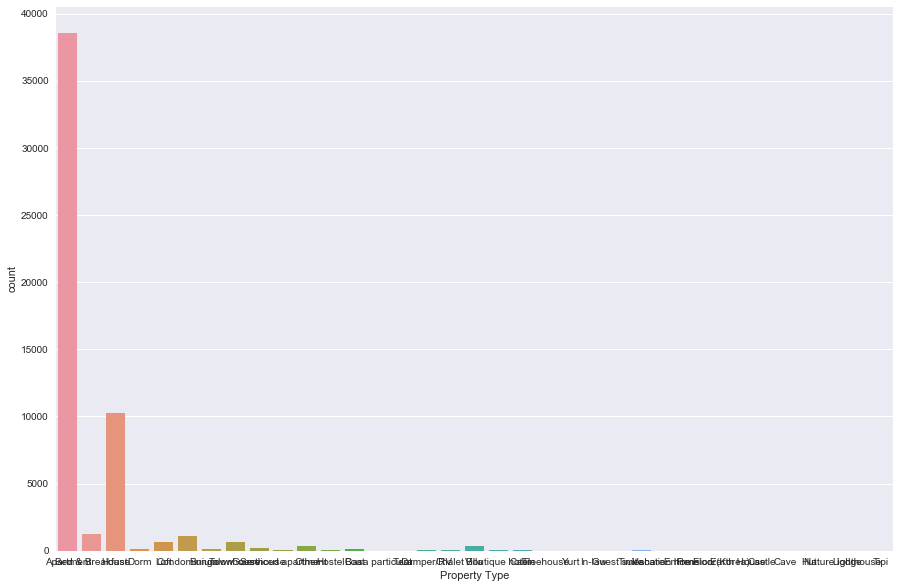

In [135]:
plt.figure(figsize=(15,10))
sns.countplot(x = dff1["Property Type"])
plt.show()

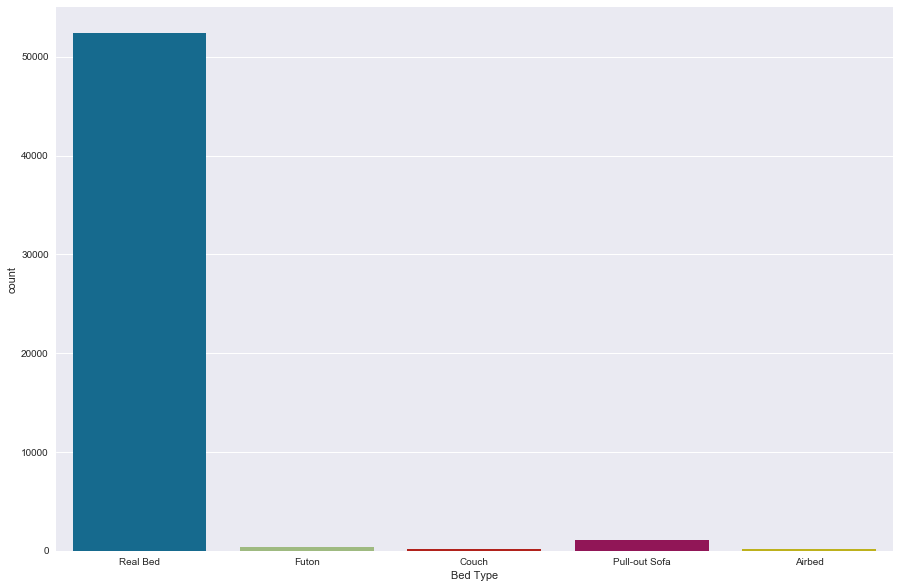

In [136]:
plt.figure(figsize=(15,10))
sns.countplot(x = dff1["Bed Type"])
plt.show()

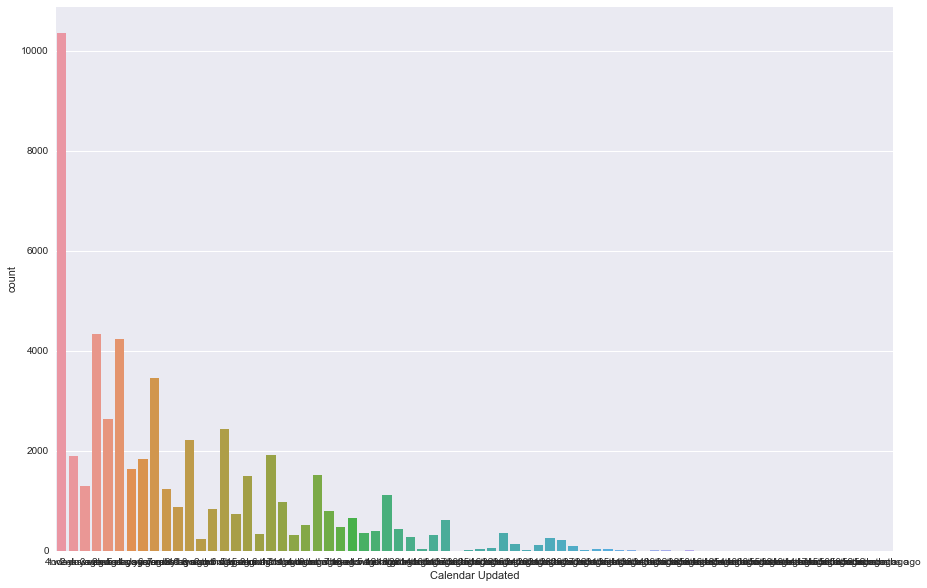

In [137]:
plt.figure(figsize=(15,10))
sns.countplot(x = dff1["Calendar Updated"])
plt.show()

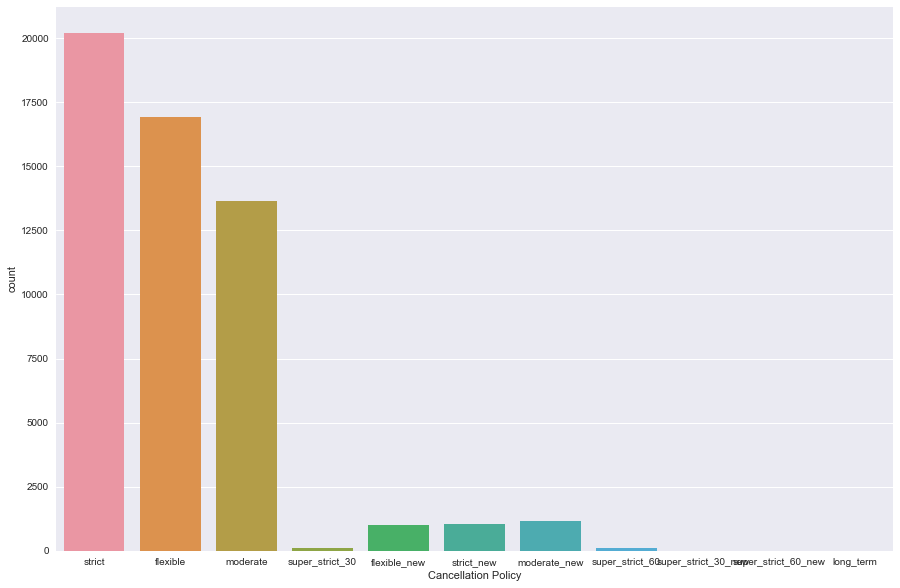

In [138]:
plt.figure(figsize=(15,10))
sns.countplot(x = dff1["Cancellation Policy"])
plt.show()

In [139]:
df_cat=df[["Price",'Experiences Offered',
 'Country Code',
 'Host Response Time',
 'Market',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Calendar Updated',
 'Cancellation Policy']]

In [140]:
group_price=df_cat.groupby("Experiences Offered").mean()
group_price

,Price
Experiences Offered,
business,87.478261
family,155.204301
none,134.968647
romantic,115.809524
social,72.129412


In [141]:
group_price=dff1.groupby("Experiences Offered").mean()
group_price

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Experiences Offered,,,,,,,,,,,,,,,,,,,,,
business,1.110353e+07,94.867769,4.681159,4.681159,1.413043,3.521739,670.753623,14.398551,31.862319,49.905797,...,87.478261,10.884058,93.454545,9.590909,9.431818,9.765152,9.803030,9.386364,9.295455,4.152174
family,1.017608e+07,91.529412,9.580645,9.580645,2.774194,3.860215,6678.397849,8.806452,18.698925,29.989247,...,155.204301,13.655914,91.722892,9.530120,9.132530,9.554217,9.686747,9.204819,9.060241,9.021505
none,3.237942e+07,93.627093,9.146717,9.146717,1.554167,3.246705,280797.108558,9.821886,22.736514,37.630462,...,134.968647,10.911896,92.819993,9.525001,9.315100,9.687042,9.704504,9.467766,9.312655,6.568849
romantic,1.125336e+07,95.514286,15.000000,15.000000,1.500000,3.761905,716.642857,11.214286,23.904762,39.976190,...,115.809524,7.785714,93.102564,9.600000,9.225000,9.675000,9.825000,9.475000,9.225000,14.523810
social,1.044253e+07,96.575758,5.129412,5.129412,1.458824,2.729412,625.129412,11.094118,24.352941,40.458824,...,72.129412,10.035294,92.810127,9.417722,9.101266,9.797468,9.759494,9.227848,9.088608,4.882353


In [142]:
group_price=df_cat.groupby("Country Code").mean()
group_price

,Price
Country Code,
AT,64.295343
AU,168.952763
BE,69.512668
CA,105.244294
CH,111.453202
CN,378.166667
DE,57.653824
DK,600.206324
ES,96.447695


In [143]:
group_price=dff1.groupby("Country Code").mean()
group_price

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Country Code,,,,,,,,,,,,,,,,,,,,,
AT,3.714264e+07,94.838957,4.747549,4.747549,1.506127,3.329657,7.676005e+02,8.221814,20.203431,34.714461,...,64.295343,8.682598,93.895988,9.648810,9.467262,9.747024,9.711310,9.390788,9.459138,4.090686
AU,3.472229e+07,94.781280,6.315680,6.315680,1.486127,3.401055,7.470621e+02,10.260261,24.501261,40.592295,...,168.952763,9.815868,93.144409,9.532692,9.295324,9.714056,9.726603,9.596598,9.354321,5.130016
BE,3.307722e+07,92.445298,6.654247,6.654247,1.450075,2.725782,6.402249e+06,9.268256,22.549925,37.733234,...,69.512668,7.119225,91.220532,9.450382,9.222857,9.635496,9.655238,9.196565,9.240458,3.530551
CA,3.316389e+07,93.899260,3.806292,3.806292,1.505552,3.734732,6.632224e+05,10.310302,23.359655,37.931215,...,105.244294,10.194016,93.375158,9.577119,9.343776,9.717069,9.725465,9.558475,9.446466,2.827884
CH,2.525287e+07,93.511765,5.955665,5.955665,1.261084,2.798030,8.488522e+02,13.492611,29.645320,48.369458,...,111.453202,11.394089,91.834483,9.465278,9.400000,9.544828,9.648276,9.372414,9.103448,3.842365
CN,4.604015e+07,100.000000,1.333333,1.333333,1.000000,1.500000,1.125000e+03,20.500000,45.166667,70.166667,...,378.166667,0.000000,95.000000,10.000000,9.500000,10.000000,10.000000,9.500000,9.500000,1.333333
DE,3.298206e+07,90.048495,2.001701,2.001701,1.357507,4.323513,7.044952e+02,5.321813,12.773938,21.912181,...,57.653824,7.711048,93.136103,9.547088,9.234195,9.646508,9.663551,9.393525,9.335256,1.733144
DK,3.483235e+07,93.934227,1.253165,1.253165,1.401581,3.266403,6.769043e+02,5.099605,12.124111,18.735178,...,600.206324,59.753956,94.143139,9.628458,9.330040,9.790099,9.833004,9.467327,9.406343,1.207905
ES,3.409897e+07,94.402693,25.379169,25.379169,1.689278,3.428735,8.961999e+02,10.463550,24.963877,41.822164,...,96.447695,7.628310,90.807393,9.341888,9.228266,9.570279,9.574520,9.418231,9.113296,20.061621


In [144]:
group_price=dff1.groupby("Host Response Time").mean()
group_price

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Host Response Time,,,,,,,,,,,,,,,,,,,,,
a few days or more,3.650550e+07,15.033820,2.796311,2.796311,1.298232,3.235204,780.813989,18.305150,39.522675,62.253651,...,125.008455,9.306687,89.898329,9.279102,8.877266,9.442577,9.488796,9.322581,9.060309,2.333076
within a day,2.929269e+07,87.238218,6.901872,6.901872,1.485733,3.469464,2046.694900,11.501614,26.370562,43.635636,...,138.540865,11.146546,92.954922,9.534486,9.283056,9.690797,9.696728,9.478275,9.299384,4.124677
within a few hours,2.848004e+07,96.812114,14.270673,14.270673,1.632488,3.425330,817244.535650,10.943701,25.463401,42.404158,...,139.397228,11.915686,93.064546,9.536873,9.346553,9.710462,9.719403,9.493280,9.325187,10.314120
within an hour,3.500572e+07,98.945759,12.249877,12.249877,1.704010,2.826636,98703.749764,10.570159,25.214225,42.350366,...,127.365588,12.076920,92.888367,9.536256,9.394544,9.695946,9.707383,9.478888,9.330408,8.906122


In [145]:
group_price=df_cat.groupby("Host Response Time").mean()
group_price

,Price
Host Response Time,
a few days or more,125.008455
within a day,138.540865
within a few hours,139.397228
within an hour,127.365588


In [146]:
group_price=dff1.groupby("Market").mean()
group_price

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Market,,,,,,,,,,,,,,,,,,,,,
Agra,9.933134e+06,86.000000,1.000000,1.000000,1.000000,4.000000,1.125000e+03,27.000000,53.000000,83.000000,...,170.000000,0.000000,83.000000,9.000000,7.000000,10.000000,9.000000,9.000000,9.000000,1.000000
Amsterdam,3.163835e+07,94.695417,3.586950,3.586950,1.495180,3.006748,7.579319e+02,2.297558,7.009961,13.808483,...,130.855398,11.039203,93.681870,9.583239,9.379388,9.703255,9.745564,9.384091,9.157137,3.049486
Antwerp,3.511505e+07,94.322727,2.362264,2.362264,1.411321,2.203774,1.188321e+03,10.720755,26.437736,42.109434,...,78.147170,7.773585,91.820276,9.447005,9.304147,9.723502,9.732719,9.184332,9.248848,2.256604
Aspen and Vail,4.421427e+06,100.000000,2.000000,2.000000,2.000000,3.000000,1.125000e+03,16.000000,42.000000,55.000000,...,187.000000,29.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,1.000000
Athens,4.272029e+07,95.622378,8.149448,8.149448,1.733200,2.520562,2.099731e+04,13.227683,30.908726,51.393180,...,54.562688,6.715145,94.315722,9.685161,9.585806,9.838292,9.838501,9.458656,9.586563,4.034102
Austin,2.923949e+07,94.662966,8.418866,8.418866,1.886019,2.271757,7.065160e+02,12.573835,27.921392,45.504211,...,228.975295,12.817518,95.717333,9.765125,9.545374,9.869759,9.895018,9.625335,9.576271,3.468276
Barcelona,3.190186e+07,93.951712,9.210526,9.210526,1.647115,3.327064,8.928205e+02,7.766337,19.629264,35.347466,...,87.933057,8.963022,89.881626,9.260296,9.132136,9.517807,9.512995,9.421369,9.014806,6.920625
Barrie,5.016761e+07,100.000000,24.000000,24.000000,1.000000,1.000000,1.125000e+03,2.000000,32.000000,62.000000,...,68.000000,20.000000,78.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,24.000000
Basque Country,6.550800e+06,NaN,2.000000,2.000000,1.000000,1.000000,1.125000e+03,0.000000,0.000000,0.000000,...,220.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [147]:
group_price=df_cat.groupby("Market").mean()
group_price

,Price
Market,
Agra,170.000000
Amsterdam,130.855398
Antwerp,78.147170
Aspen and Vail,187.000000
Athens,54.562688
Austin,228.975295
Barcelona,87.933057
Barrie,68.000000
Basque Country,220.000000


In [148]:
group_price=dff1.groupby("Property Type").mean()
group_price

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Property Type,,,,,,,,,,,,,,,,,,,,,
Apartment,3.180776e+07,93.290702,7.958724,7.958724,1.493646,3.399637,3.354996e+05,8.735581,20.463356,34.286385,...,127.325934,10.681683,92.474189,9.507520,9.277915,9.666598,9.692252,9.475492,9.277241,5.571458
Bed & Breakfast,3.203849e+07,92.250000,4.531299,4.531299,1.304144,1.581704,7.800141e+02,15.515246,35.400313,57.434715,...,91.752150,11.497653,92.244596,9.391304,9.477765,9.652523,9.611684,9.360825,9.258028,3.861502
Boat,3.224922e+07,95.561538,3.715328,3.715328,1.861314,2.306569,6.919270e+02,7.175182,16.678832,27.167883,...,184.890511,16.109489,94.076923,9.612069,9.358974,9.784483,9.769231,9.469565,9.120690,2.686131
Boutique hotel,8.001633e+07,92.781250,11.647887,11.647887,1.225352,1.380282,6.290423e+02,15.436620,34.605634,54.774648,...,130.549296,7.408451,86.685714,8.942857,9.028571,9.628571,9.371429,8.971429,8.800000,10.887324
Bungalow,3.586699e+07,97.448276,2.604478,2.604478,1.529851,2.626866,7.124776e+02,11.305970,27.708955,47.201493,...,131.194030,10.440299,95.028302,9.764151,9.632075,9.915094,9.915094,9.764151,9.669811,2.343284
Cabin,3.210252e+07,96.047619,6.450549,6.450549,1.373626,1.967033,7.206044e+02,11.912088,29.021978,47.527473,...,129.373626,9.835165,94.064103,9.692308,9.641026,9.833333,9.820513,9.461538,9.384615,4.384615
Camper/RV,2.706558e+07,87.820513,3.400000,3.400000,1.400000,1.866667,6.683111e+02,18.777778,41.266667,64.000000,...,110.577778,9.733333,90.966667,9.466667,9.133333,9.700000,9.600000,9.533333,9.366667,2.644444
Casa particular,1.008348e+08,100.000000,1.500000,1.500000,1.000000,3.000000,1.125000e+03,8.000000,35.000000,50.000000,...,23.000000,0.000000,97.000000,10.000000,10.000000,9.000000,8.000000,10.000000,10.000000,1.000000
Castle,3.303129e+07,96.250000,2.200000,2.200000,1.500000,1.700000,4.829000e+02,16.900000,29.100000,47.000000,...,234.400000,39.900000,93.500000,9.250000,9.500000,9.500000,9.625000,9.750000,9.375000,1.800000


In [149]:
group_price=df_cat.groupby("Property Type").mean()
group_price

,Price
Property Type,
Apartment,127.325934
Bed & Breakfast,91.752150
Boat,184.890511
Boutique hotel,130.549296
Bungalow,131.194030
Cabin,129.373626
Camper/RV,110.577778
Casa particular,23.000000
Castle,234.400000


In [150]:
group_price=dff1.groupby("Room Type").mean()
group_price

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Room Type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,3.034868e+07,94.316414,12.479155,12.479155,1.787965,3.691686,3.765603e+05,8.591337,20.123459,33.631570,...,168.383692,11.366842,92.899304,9.548366,9.342462,9.694263,9.718222,9.501859,9.303123,8.632138
Private room,3.499899e+07,92.589247,3.129693,3.129693,1.157903,2.481092,1.334883e+03,11.739590,26.857287,43.998194,...,77.285638,9.830138,92.782217,9.494245,9.276488,9.685400,9.689493,9.407033,9.334905,2.789889
Shared room,4.516271e+07,88.855832,7.079238,7.079238,1.056000,2.427000,2.148528e+06,16.750000,36.110000,56.623000,...,60.729000,15.674000,90.319685,9.206022,8.958926,9.431746,9.482595,9.248013,9.168521,6.698699


In [151]:
group_price=df_cat.groupby("Room Type").mean()
group_price

,Price
Room Type,
Entire home/apt,168.383692
Private room,77.285638
Shared room,60.729000


In [152]:
group_price=dff1.groupby("Bed Type").mean()
group_price

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Bed Type,,,,,,,,,,,,,,,,,,,,,
Airbed,2.701033e+07,91.010870,7.189781,7.189781,1.197080,2.102190,679.343066,12.021898,27.102190,43.379562,...,91.481752,12.430657,93.908163,9.520408,9.397959,9.734694,9.734694,9.367347,9.265306,6.985294
Couch,2.812540e+07,88.377622,1.825328,1.825328,1.139738,2.563319,655.174672,10.279476,22.982533,37.205240,...,94.510917,7.786026,90.963415,9.432927,9.067073,9.701220,9.676829,9.378049,9.195122,1.592920
Futon,2.431161e+07,94.638132,1.569921,1.569921,1.248021,4.596306,643.891821,8.440633,20.015831,33.461741,...,82.973615,11.084433,93.200680,9.561224,9.234694,9.768707,9.768707,9.510204,9.309524,1.485488
Pull-out Sofa,2.888112e+07,92.233548,3.276476,3.276476,1.212547,2.878277,709.969101,9.496255,22.064607,36.789326,...,76.721910,6.455993,92.322807,9.540351,9.349708,9.729508,9.743860,9.464244,9.311841,2.878873
Real Bed,3.239374e+07,93.678338,9.345485,9.345485,1.567681,3.251817,288583.263207,9.844186,22.777812,37.689803,...,136.615473,11.012001,92.833141,9.524883,9.315263,9.685508,9.703728,9.466838,9.312169,6.702821


In [153]:
group_price=df_cat.groupby("Bed Type").mean()
group_price

,Price
Bed Type,
Airbed,91.481752
Couch,94.510917
Futon,82.973615
Pull-out Sofa,76.721910
Real Bed,136.615473


In [154]:
group_price=dff1.groupby("Cancellation Policy").mean()
group_price

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Cancellation Policy,,,,,,,,,,,,,,,,,,,,,
flexible,3.819889e+07,89.999328,2.632811,2.632811,1.218573,2.871042,128250.290406,9.758448,21.742616,35.172791,...,124.121574,7.092869,92.846099,9.535608,9.213801,9.696272,9.714006,9.444582,9.348472,2.289866
flexible_new,3.982808e+07,90.697270,4.492552,4.492552,1.466733,2.044687,762.654419,13.321748,31.180735,51.739821,...,83.737835,7.868918,91.848819,9.458991,9.394322,9.656151,9.641956,9.296998,9.302215,3.841112
long_term,1.751590e+05,100.000000,2.000000,2.000000,1.000000,1.000000,730.000000,0.000000,0.000000,0.000000,...,58.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
moderate,2.961122e+07,94.781325,3.359997,3.359997,1.546793,2.862844,159499.031708,8.669962,20.396895,34.210164,...,124.482279,11.699304,93.699127,9.607146,9.383325,9.752100,9.774202,9.504114,9.396328,2.807323
moderate_new,3.291710e+07,96.229401,7.931330,7.931330,1.802575,2.024893,711.818884,9.945064,25.293562,44.555365,...,91.742489,11.222318,92.285276,9.478484,9.483607,9.669057,9.642418,9.346311,9.280738,5.327897
strict,2.866659e+07,94.905586,16.833804,16.833804,1.800376,3.995496,533317.006138,10.441519,24.354403,40.388804,...,155.981636,13.702618,92.345932,9.473764,9.306528,9.644836,9.665341,9.466079,9.241773,11.875074
strict_new,2.607051e+07,96.118731,14.313876,14.313876,2.045933,2.276555,737.121531,9.784689,25.401914,45.090909,...,110.835407,12.266986,91.461451,9.413167,9.431328,9.595455,9.579545,9.487500,9.165909,8.879426
super_strict_30,4.776694e+07,94.029703,193.366337,193.366337,1.831683,4.227723,10863.722772,16.950495,38.594059,59.752475,...,188.257426,10.128713,89.621622,9.305556,9.555556,9.472222,9.583333,9.250000,9.083333,74.287129
super_strict_30_new,6.885743e+07,97.200000,112.600000,112.600000,1.600000,1.600000,905.000000,12.800000,36.000000,61.600000,...,133.400000,13.600000,99.000000,10.000000,9.500000,10.000000,9.000000,10.000000,10.000000,5.800000


In [155]:
group_price=df_cat.groupby("Cancellation Policy").mean()
group_price

,Price
Cancellation Policy,
flexible,124.121574
flexible_new,83.737835
long_term,58.000000
moderate,124.482279
moderate_new,91.742489
strict,155.981636
strict_new,110.835407
super_strict_30,188.257426
super_strict_30_new,133.400000


In [156]:
group_price=df_cat.groupby("Calendar Updated").mean()
group_price

,Price
Calendar Updated,
1 week ago,121.982188
10 months ago,127.888350
11 months ago,138.333992
12 months ago,172.092807
13 months ago,156.172805
14 months ago,165.231746
15 months ago,114.935484
16 months ago,122.764706
17 months ago,151.664557


In [157]:
group_price=dff1.groupby("Calendar Updated").mean()
group_price

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Calendar Updated,,,,,,,,,,,,,,,,,,,,,
1 week ago,3.348171e+07,95.322667,4.636132,4.636132,1.582697,3.129771,6.593053e+02,9.842239,23.587786,40.860051,...,121.982188,12.134860,93.581538,9.543210,9.329231,9.765432,9.756173,9.410494,9.339506,3.846939
10 months ago,3.251374e+07,68.010753,1.650485,1.650485,1.244337,3.432039,7.781650e+02,6.118123,12.677994,19.422330,...,127.888350,5.919094,92.022364,9.459807,9.086817,9.591640,9.705502,9.427653,9.280645,1.408428
11 months ago,3.167407e+07,67.651515,1.837624,1.837624,1.231225,4.029644,7.981976e+02,5.920949,12.233202,18.669960,...,138.333992,7.385375,90.826446,9.343096,8.983333,9.606695,9.675000,9.436975,9.205882,1.551383
12 months ago,3.004238e+07,74.847826,1.686775,1.686775,1.206497,2.853828,8.341253e+02,6.055684,12.345708,18.700696,...,172.092807,6.839907,92.322115,9.458937,9.033816,9.541063,9.632850,9.326923,9.240385,1.373550
13 months ago,2.762707e+07,64.552632,1.371105,1.371105,1.303116,2.546742,8.332153e+02,5.416431,11.016997,16.711048,...,156.172805,9.150142,92.047904,9.472727,8.969697,9.575758,9.636364,9.397590,9.108434,1.303116
14 months ago,2.548156e+07,61.043478,1.248408,1.248408,1.304762,6.076190,6.818255e+06,3.415873,7.009524,10.628571,...,165.231746,7.692063,91.349650,9.319149,8.914894,9.581560,9.640845,9.404255,9.091549,1.219048
15 months ago,2.851213e+07,69.380952,1.167155,1.167155,1.290323,3.595308,8.305220e+02,3.985337,8.214076,12.436950,...,114.935484,7.328446,90.666667,9.364238,8.842105,9.463576,9.627451,9.230263,9.125000,1.131965
16 months ago,2.817668e+07,60.259259,1.338028,1.338028,1.173669,3.806723,8.875910e+02,3.759104,7.759104,11.773109,...,122.764706,5.728291,92.554054,9.513699,8.863014,9.609589,9.691781,9.246575,9.273973,1.308123
17 months ago,2.529342e+07,67.230769,1.215873,1.215873,1.218354,3.506329,8.161392e+02,5.284810,10.689873,16.151899,...,151.664557,7.139241,91.189394,9.317829,8.878788,9.564885,9.704545,9.259542,9.107692,1.186709


In [158]:
dff1.isnull().sum()

Listing Url                           0
Experiences Offered                   0
Host ID                               0
Host URL                              0
Street                                0
Neighbourhood Cleansed                0
Smart Location                        0
Country Code                          0
Host Location                       253
Host Response Time                12378
Host Response Rate                12378
Host Listings Count                  52
Host Total Listings Count            52
Host Verifications                   30
Neighbourhood                     16670
City                                 49
State                              5053
Zipcode                            1999
Market                              625
Property Type                         0
Room Type                             0
Bed Type                              0
Guests Included                       0
Minimum Nights                        0
Maximum Nights                        0


In [159]:
df_cat.isnull().sum()

Price                    772
Experiences Offered        0
Country Code               0
Host Response Time     12610
Market                   653
Property Type              0
Room Type                  0
Bed Type                   0
Calendar Updated           0
Cancellation Policy        0
dtype: int64

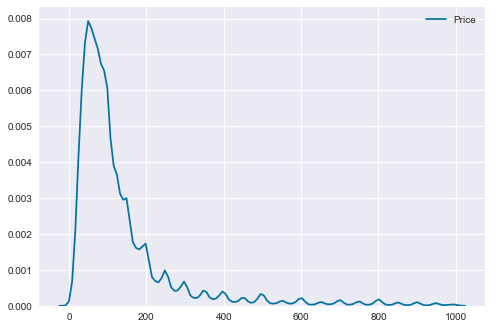

In [160]:
# Make default density plot
sns.kdeplot(df['Price'])
#sns.plt.show()


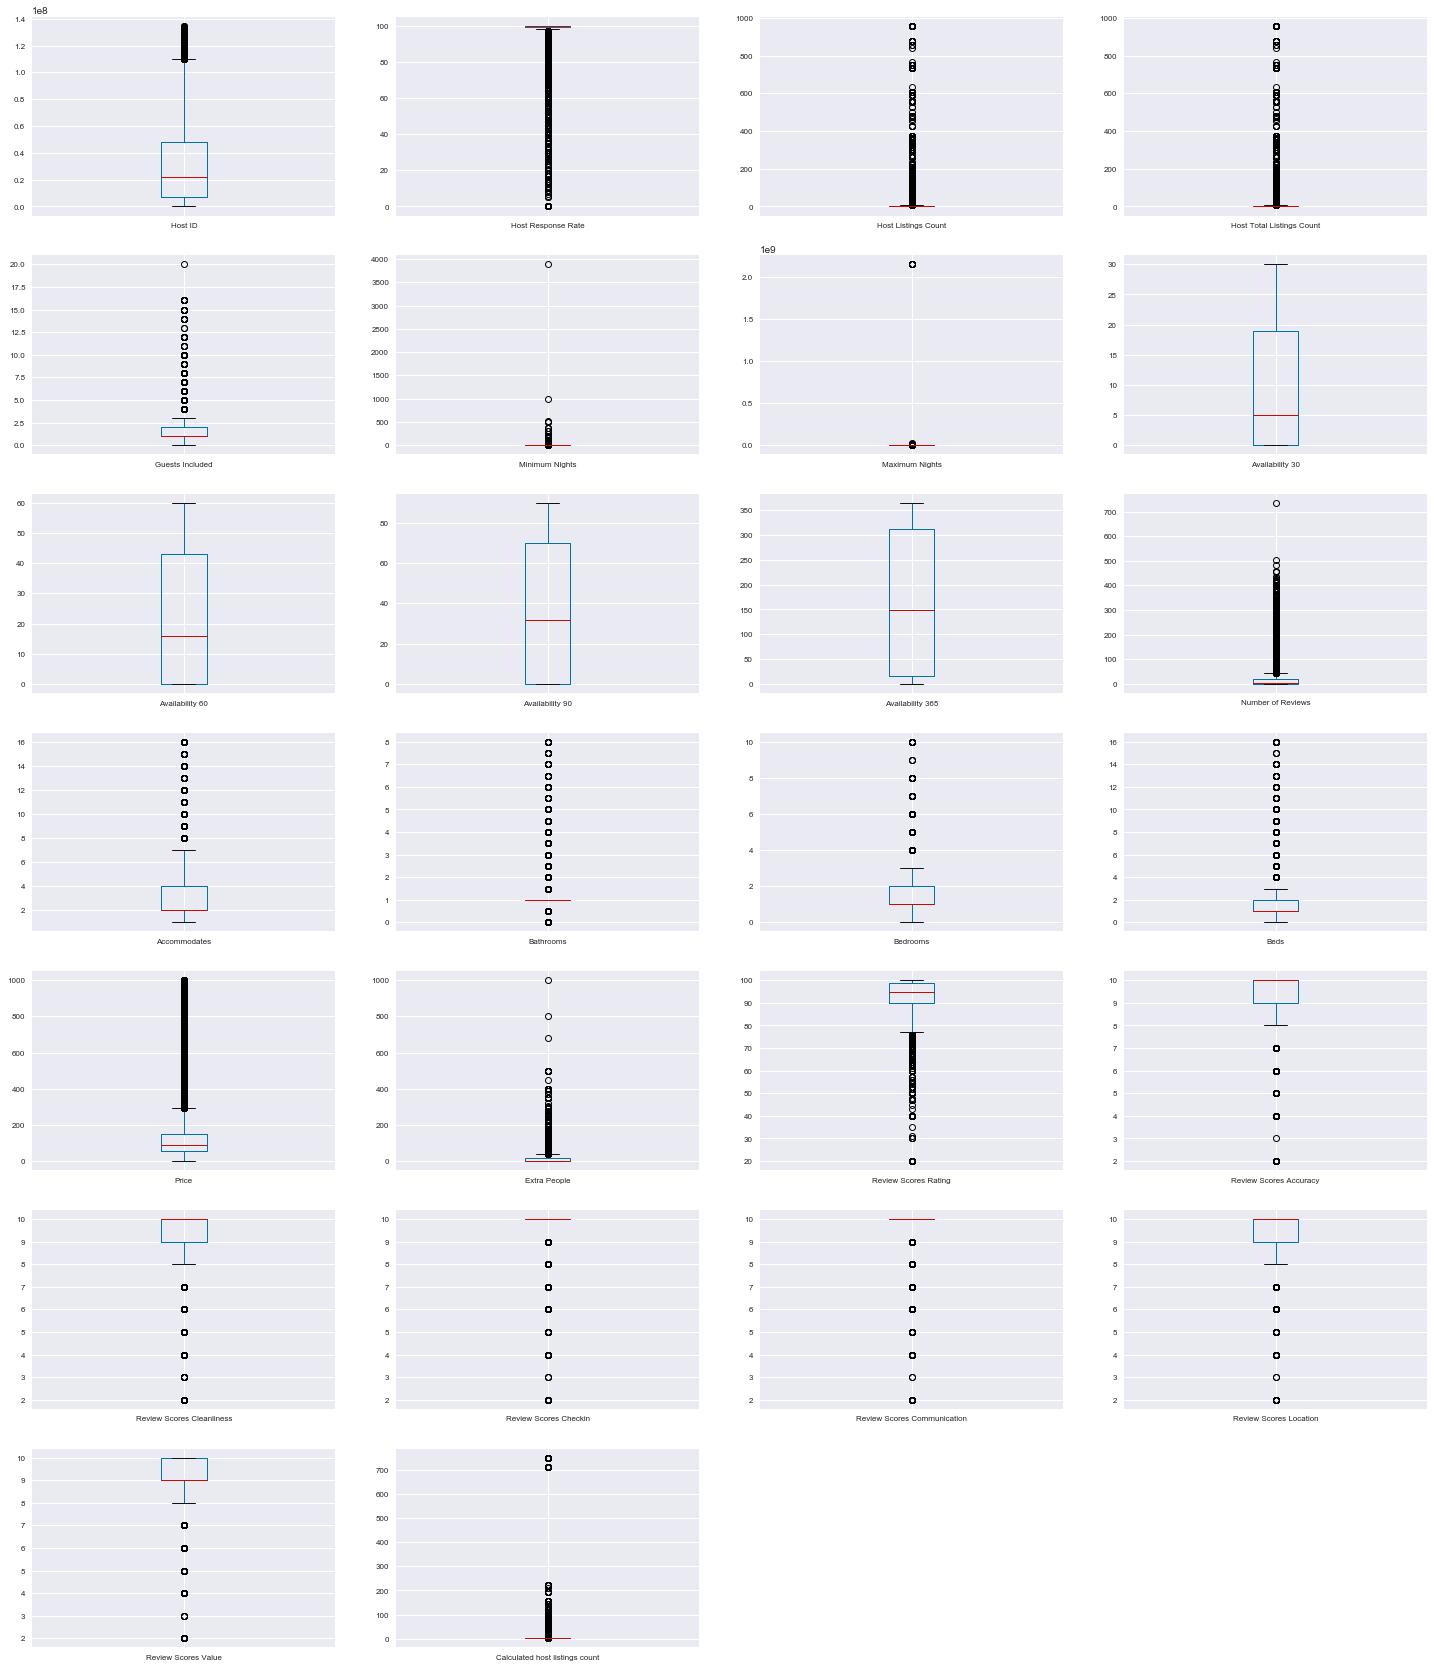

In [161]:
dff1.plot(kind='box', subplots=True, layout=(7,4), sharex=False, sharey=False,fontsize=8, figsize = (25,30))
plt.show()

In [162]:
dff1.corr()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Host ID,1.000000,-0.022717,-0.045395,-0.045395,-0.066749,-0.021680,-0.005495,0.050340,0.057876,0.060559,...,-0.040235,-0.049577,-0.020142,-0.016538,-0.013762,-0.015534,-0.038735,-0.015059,0.015208,-0.038210
Host Response Rate,-0.022717,1.000000,0.026411,0.026411,0.065680,-0.001112,0.001261,-0.146129,-0.136729,-0.130066,...,0.009376,0.020710,0.087487,0.073991,0.114341,0.078632,0.079453,0.042265,0.073977,0.028665
Host Listings Count,-0.045395,0.026411,1.000000,1.000000,0.000088,0.009923,0.000425,0.039436,0.040537,0.036565,...,0.057526,-0.035264,-0.071910,-0.063910,-0.026936,-0.087642,-0.087719,-0.025859,-0.074220,0.885224
Host Total Listings Count,-0.045395,0.026411,1.000000,1.000000,0.000088,0.009923,0.000425,0.039436,0.040537,0.036565,...,0.057526,-0.035264,-0.071910,-0.063910,-0.026936,-0.087642,-0.087719,-0.025859,-0.074220,0.885224
Guests Included,-0.066749,0.065680,0.000088,0.000088,1.000000,0.004110,0.006831,0.020031,0.024599,0.028547,...,0.223558,0.265529,0.012445,0.007064,0.030030,0.016239,0.012082,0.005240,-0.002150,0.006444
Minimum Nights,-0.021680,-0.001112,0.009923,0.009923,0.004110,1.000000,0.084611,-0.007135,-0.007761,-0.006112,...,0.002689,-0.006913,0.001669,-0.000001,-0.005635,-0.007553,-0.006893,-0.001938,-0.003114,0.009553
Maximum Nights,-0.005495,0.001261,0.000425,0.000425,0.006831,0.084611,1.000000,0.008255,0.007965,0.006650,...,-0.004190,0.001952,-0.007809,-0.007476,0.000228,-0.005887,-0.006249,-0.012214,-0.008667,0.000705
Availability 30,0.050340,-0.146129,0.039436,0.039436,0.020031,-0.007135,0.008255,1.000000,0.939777,0.881832,...,0.029810,0.049375,-0.062944,-0.066968,-0.012431,-0.044801,-0.063531,-0.052191,-0.067550,0.020389
Availability 60,0.057876,-0.136729,0.040537,0.040537,0.024599,-0.007761,0.007965,0.939777,1.000000,0.971314,...,0.014091,0.057015,-0.058626,-0.062451,0.001339,-0.038301,-0.060082,-0.046829,-0.063587,0.021927
Availability 90,0.060559,-0.130066,0.036565,0.036565,0.028547,-0.006112,0.006650,0.881832,0.971314,1.000000,...,-0.003098,0.055819,-0.055029,-0.058861,0.010759,-0.033397,-0.056271,-0.040960,-0.058873,0.017898


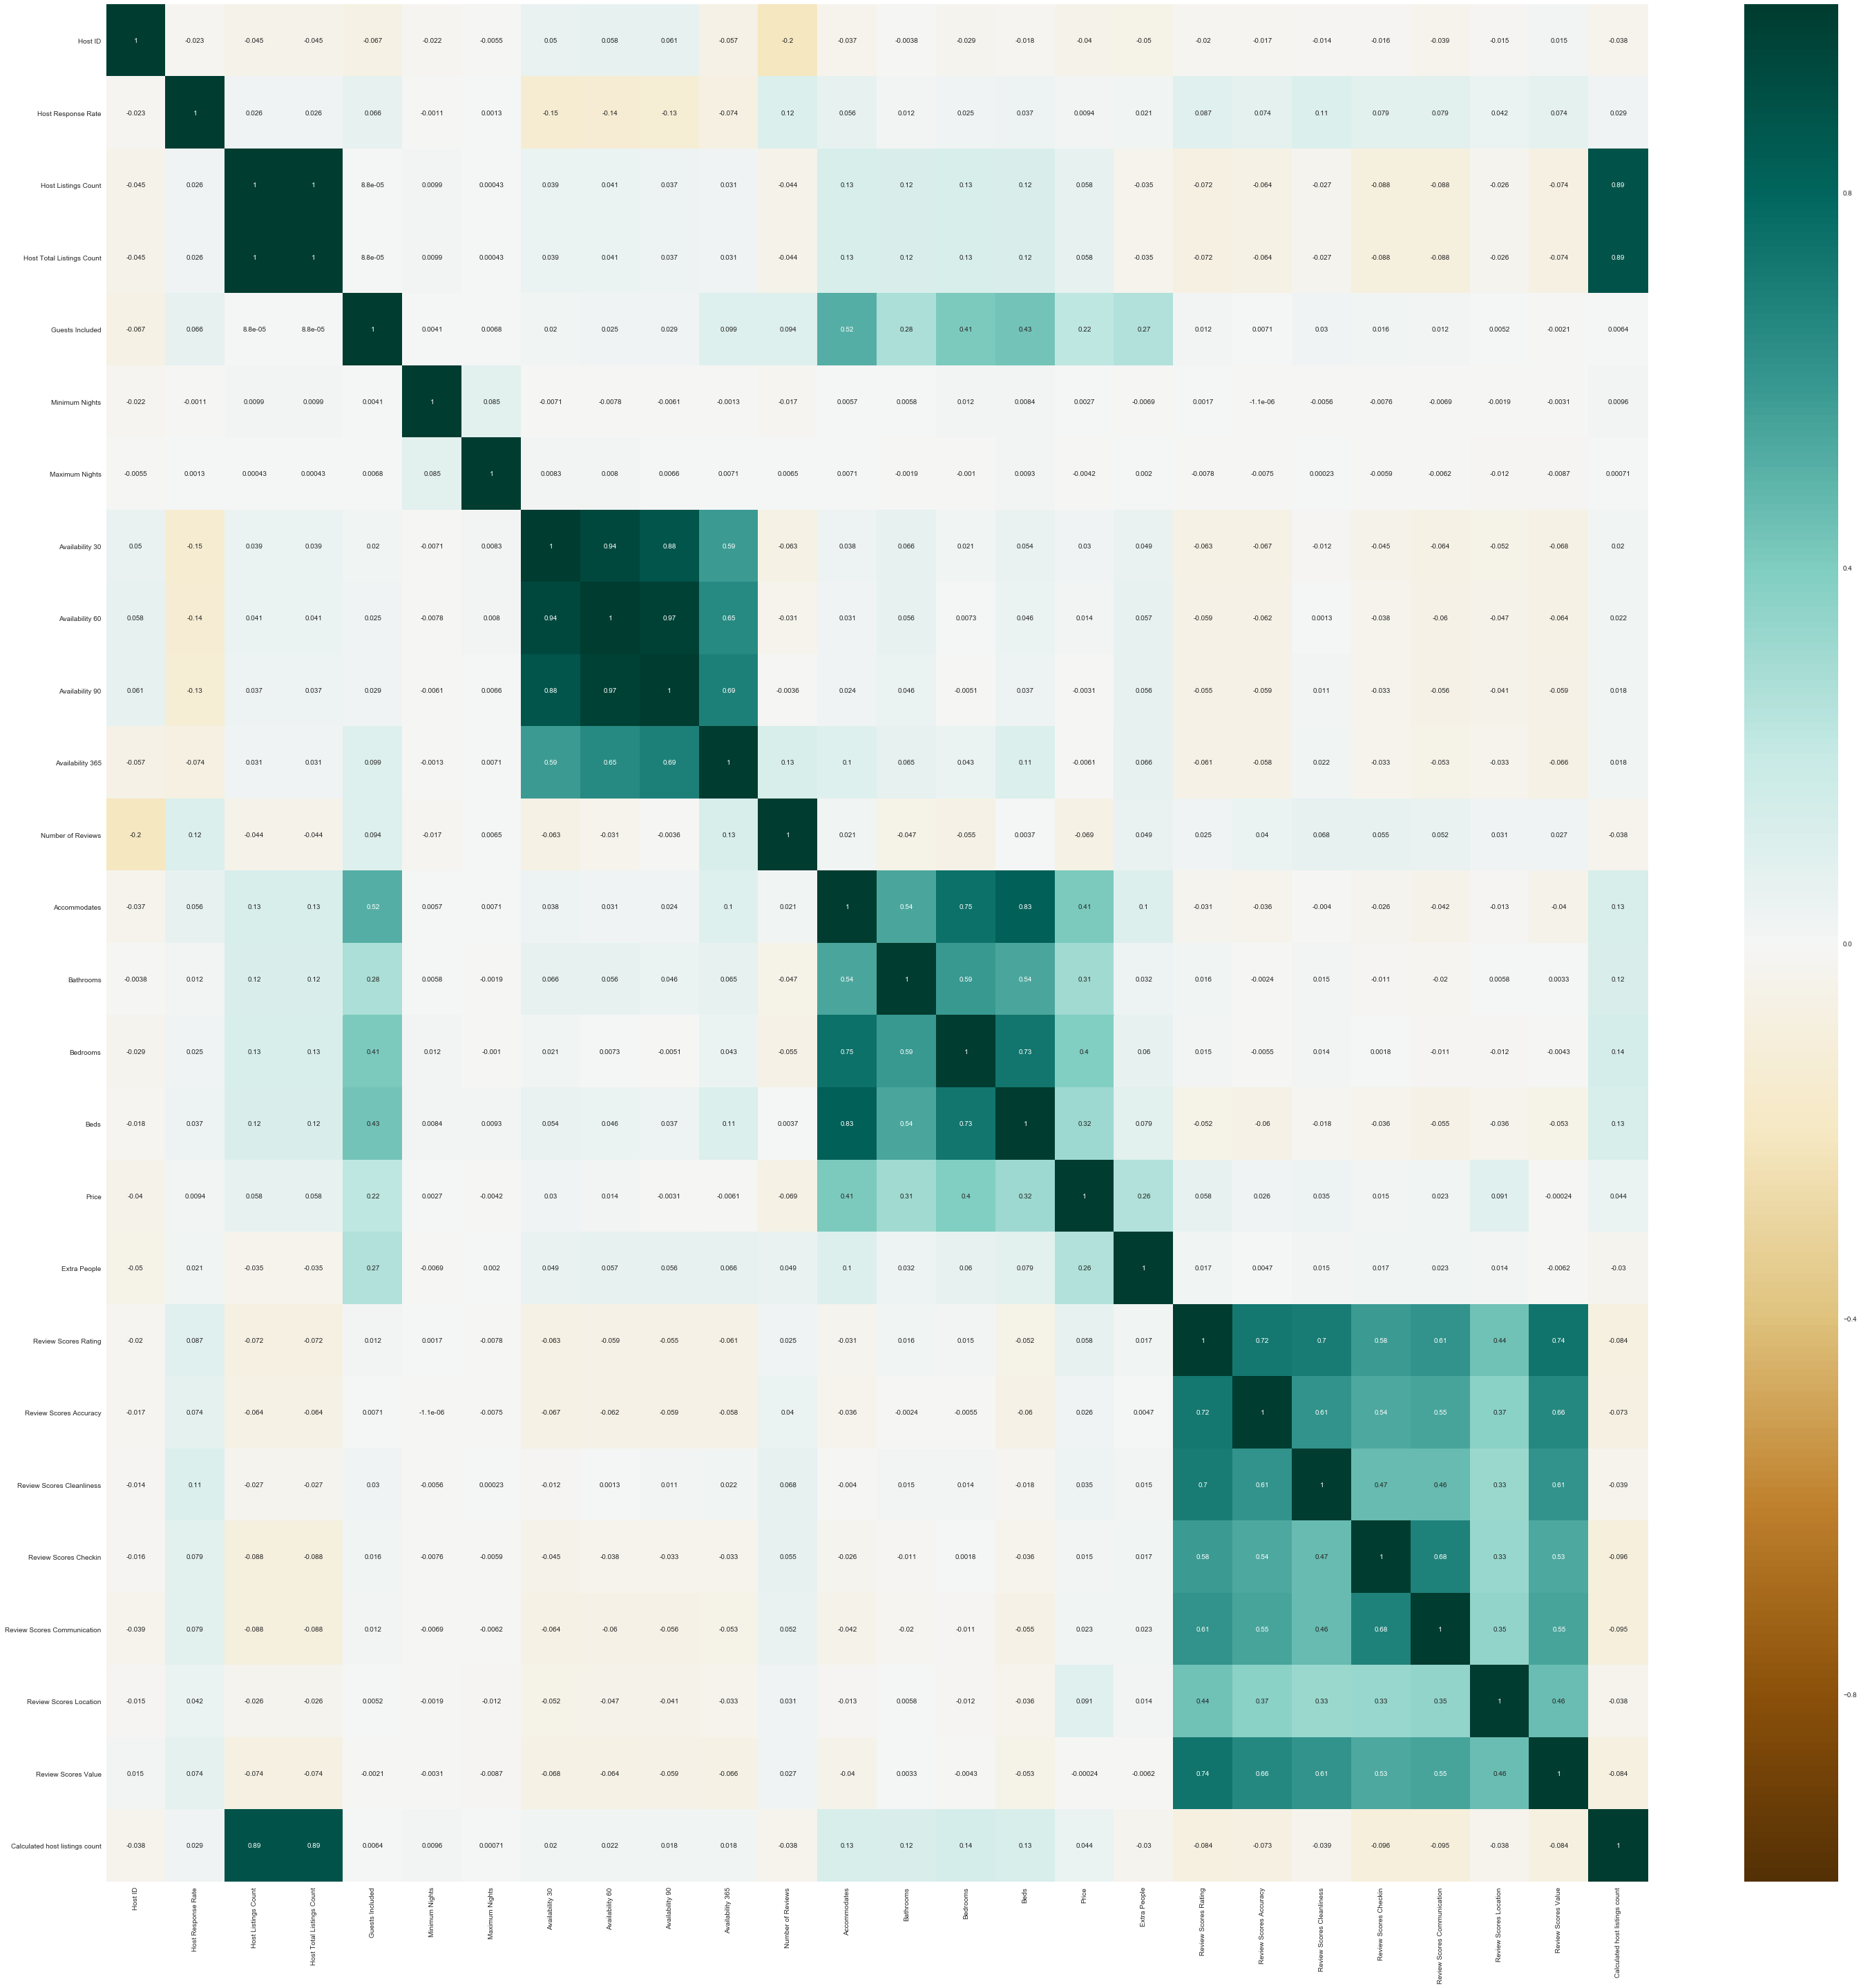

In [163]:
plt.figure(figsize=(50,50))
c= dff1.corr()
sns.heatmap(c,cmap="BrBG",vmin=-1,vmax=1,annot=True)
plt.show()

In [164]:
for i in range(len(df_cat.columns)):
    print(df_cat[df_cat.columns[i]])
    print(df_cat[df_cat.columns[i]].value_counts())
    print("\n")

0         30.0
1         70.0
2        149.0
3         45.0
4         69.0
5         59.0
6         59.0
7        150.0
8         85.0
9         49.0
10        38.0
11        22.0
12        65.0
13       200.0
14        35.0
15        30.0
16        85.0
17        50.0
18        29.0
19       130.0
20        36.0
21        50.0
22        50.0
23        59.0
24        35.0
25       130.0
26        60.0
27        54.0
28        49.0
29        50.0
         ...  
54970     80.0
54971     75.0
54972    150.0
54973    100.0
54974     75.0
54975     60.0
54976     65.0
54977     59.0
54978     39.0
54979    105.0
54980     38.0
54981     57.0
54982    325.0
54983     40.0
54984    149.0
54985     59.0
54986     55.0
54987    151.0
54988    999.0
54989    150.0
54990    215.0
54991     79.0
54992     47.0
54993     30.0
54994     80.0
54995    135.0
54996    250.0
54997     70.0
54998    119.0
54999     55.0
Name: Price, Length: 55000, dtype: float64
100.0    1884
50.0     1855
60.0     1684


In [165]:
dff1.shape

(54228, 46)

In [166]:
dff1.columns

Index(['Listing Url', 'Experiences Offered', 'Host ID', 'Host URL', 'Street',
       'Neighbourhood Cleansed', 'Smart Location', 'Country Code',
       'Host Location', 'Host Response Time', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'Neighbourhood', 'City', 'State', 'Zipcode',
       'Market', 'Property Type', 'Room Type', 'Bed Type', 'Guests Included',
       'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Cancellation Policy',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Extra People', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count'],
      dtype='object')

In [167]:
dff1.select_dtypes(include="object").nunique()

Listing Url               54228
Experiences Offered           5
Host URL                  49057
Street                    21716
Neighbourhood Cleansed     1930
Smart Location             2025
Country Code                 19
Host Location              3160
Host Response Time            4
Host Verifications          536
Neighbourhood              1879
City                       1899
State                       506
Zipcode                   11343
Market                       76
Property Type                35
Room Type                     3
Bed Type                      5
Calendar Updated             72
Cancellation Policy          11
dtype: int64

In [168]:
dff1.select_dtypes(include="object").isnull().sum()

Listing Url                   0
Experiences Offered           0
Host URL                      0
Street                        0
Neighbourhood Cleansed        0
Smart Location                0
Country Code                  0
Host Location               253
Host Response Time        12378
Host Verifications           30
Neighbourhood             16670
City                         49
State                      5053
Zipcode                    1999
Market                      625
Property Type                 0
Room Type                     0
Bed Type                      0
Calendar Updated              0
Cancellation Policy           0
dtype: int64

In [169]:
dff1["Country Code"].unique()

array(['ES', 'US', 'NL', 'BE', 'GR', 'DE', 'AT', 'IT', 'FR', 'CA', 'IE',
       'GB', 'DK', 'CH', 'AU', 'HK', 'CN', 'VA', 'It'], dtype=object)

In [170]:
dff1.groupby("Country Code").mean()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Country Code,,,,,,,,,,,,,,,,,,,,,
AT,3.714264e+07,94.838957,4.747549,4.747549,1.506127,3.329657,7.676005e+02,8.221814,20.203431,34.714461,...,64.295343,8.682598,93.895988,9.648810,9.467262,9.747024,9.711310,9.390788,9.459138,4.090686
AU,3.472229e+07,94.781280,6.315680,6.315680,1.486127,3.401055,7.470621e+02,10.260261,24.501261,40.592295,...,168.952763,9.815868,93.144409,9.532692,9.295324,9.714056,9.726603,9.596598,9.354321,5.130016
BE,3.307722e+07,92.445298,6.654247,6.654247,1.450075,2.725782,6.402249e+06,9.268256,22.549925,37.733234,...,69.512668,7.119225,91.220532,9.450382,9.222857,9.635496,9.655238,9.196565,9.240458,3.530551
CA,3.316389e+07,93.899260,3.806292,3.806292,1.505552,3.734732,6.632224e+05,10.310302,23.359655,37.931215,...,105.244294,10.194016,93.375158,9.577119,9.343776,9.717069,9.725465,9.558475,9.446466,2.827884
CH,2.525287e+07,93.511765,5.955665,5.955665,1.261084,2.798030,8.488522e+02,13.492611,29.645320,48.369458,...,111.453202,11.394089,91.834483,9.465278,9.400000,9.544828,9.648276,9.372414,9.103448,3.842365
CN,4.604015e+07,100.000000,1.333333,1.333333,1.000000,1.500000,1.125000e+03,20.500000,45.166667,70.166667,...,378.166667,0.000000,95.000000,10.000000,9.500000,10.000000,10.000000,9.500000,9.500000,1.333333
DE,3.298206e+07,90.048495,2.001701,2.001701,1.357507,4.323513,7.044952e+02,5.321813,12.773938,21.912181,...,57.653824,7.711048,93.136103,9.547088,9.234195,9.646508,9.663551,9.393525,9.335256,1.733144
DK,3.483235e+07,93.934227,1.253165,1.253165,1.401581,3.266403,6.769043e+02,5.099605,12.124111,18.735178,...,600.206324,59.753956,94.143139,9.628458,9.330040,9.790099,9.833004,9.467327,9.406343,1.207905
ES,3.409897e+07,94.402693,25.379169,25.379169,1.689278,3.428735,8.961999e+02,10.463550,24.963877,41.822164,...,96.447695,7.628310,90.807393,9.341888,9.228266,9.570279,9.574520,9.418231,9.113296,20.061621


In [173]:
dff1.select_dtypes(exclude="object").isnull().sum()

Host ID                               0
Host Response Rate                12378
Host Listings Count                  52
Host Total Listings Count            52
Guests Included                       0
Minimum Nights                        0
Maximum Nights                        0
Availability 30                       0
Availability 60                       0
Availability 90                       0
Availability 365                      0
Number of Reviews                     0
Accommodates                         11
Bathrooms                           168
Bedrooms                             63
Beds                                100
Price                                 0
Extra People                          2
Review Scores Rating              13730
Review Scores Accuracy            13835
Review Scores Cleanliness         13802
Review Scores Checkin             13879
Review Scores Communication       13819
Review Scores Location            13874
Review Scores Value               13885


In [171]:
dff1['Country Code'] = ['IT' if x =="It" else x for x in dff1['Country Code']]

In [172]:
dff1['Country Code'].unique()

array(['ES', 'US', 'NL', 'BE', 'GR', 'DE', 'AT', 'IT', 'FR', 'CA', 'IE',
       'GB', 'DK', 'CH', 'AU', 'HK', 'CN', 'VA'], dtype=object)

In [174]:
dff1.groupby("Country Code").mean()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Country Code,,,,,,,,,,,,,,,,,,,,,
AT,3.714264e+07,94.838957,4.747549,4.747549,1.506127,3.329657,7.676005e+02,8.221814,20.203431,34.714461,...,64.295343,8.682598,93.895988,9.648810,9.467262,9.747024,9.711310,9.390788,9.459138,4.090686
AU,3.472229e+07,94.781280,6.315680,6.315680,1.486127,3.401055,7.470621e+02,10.260261,24.501261,40.592295,...,168.952763,9.815868,93.144409,9.532692,9.295324,9.714056,9.726603,9.596598,9.354321,5.130016
BE,3.307722e+07,92.445298,6.654247,6.654247,1.450075,2.725782,6.402249e+06,9.268256,22.549925,37.733234,...,69.512668,7.119225,91.220532,9.450382,9.222857,9.635496,9.655238,9.196565,9.240458,3.530551
CA,3.316389e+07,93.899260,3.806292,3.806292,1.505552,3.734732,6.632224e+05,10.310302,23.359655,37.931215,...,105.244294,10.194016,93.375158,9.577119,9.343776,9.717069,9.725465,9.558475,9.446466,2.827884
CH,2.525287e+07,93.511765,5.955665,5.955665,1.261084,2.798030,8.488522e+02,13.492611,29.645320,48.369458,...,111.453202,11.394089,91.834483,9.465278,9.400000,9.544828,9.648276,9.372414,9.103448,3.842365
CN,4.604015e+07,100.000000,1.333333,1.333333,1.000000,1.500000,1.125000e+03,20.500000,45.166667,70.166667,...,378.166667,0.000000,95.000000,10.000000,9.500000,10.000000,10.000000,9.500000,9.500000,1.333333
DE,3.298206e+07,90.048495,2.001701,2.001701,1.357507,4.323513,7.044952e+02,5.321813,12.773938,21.912181,...,57.653824,7.711048,93.136103,9.547088,9.234195,9.646508,9.663551,9.393525,9.335256,1.733144
DK,3.483235e+07,93.934227,1.253165,1.253165,1.401581,3.266403,6.769043e+02,5.099605,12.124111,18.735178,...,600.206324,59.753956,94.143139,9.628458,9.330040,9.790099,9.833004,9.467327,9.406343,1.207905
ES,3.409897e+07,94.402693,25.379169,25.379169,1.689278,3.428735,8.961999e+02,10.463550,24.963877,41.822164,...,96.447695,7.628310,90.807393,9.341888,9.228266,9.570279,9.574520,9.418231,9.113296,20.061621


In [175]:
dff1.groupby("Country Code").mean()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Country Code,,,,,,,,,,,,,,,,,,,,,
AT,3.714264e+07,94.838957,4.747549,4.747549,1.506127,3.329657,7.676005e+02,8.221814,20.203431,34.714461,...,64.295343,8.682598,93.895988,9.648810,9.467262,9.747024,9.711310,9.390788,9.459138,4.090686
AU,3.472229e+07,94.781280,6.315680,6.315680,1.486127,3.401055,7.470621e+02,10.260261,24.501261,40.592295,...,168.952763,9.815868,93.144409,9.532692,9.295324,9.714056,9.726603,9.596598,9.354321,5.130016
BE,3.307722e+07,92.445298,6.654247,6.654247,1.450075,2.725782,6.402249e+06,9.268256,22.549925,37.733234,...,69.512668,7.119225,91.220532,9.450382,9.222857,9.635496,9.655238,9.196565,9.240458,3.530551
CA,3.316389e+07,93.899260,3.806292,3.806292,1.505552,3.734732,6.632224e+05,10.310302,23.359655,37.931215,...,105.244294,10.194016,93.375158,9.577119,9.343776,9.717069,9.725465,9.558475,9.446466,2.827884
CH,2.525287e+07,93.511765,5.955665,5.955665,1.261084,2.798030,8.488522e+02,13.492611,29.645320,48.369458,...,111.453202,11.394089,91.834483,9.465278,9.400000,9.544828,9.648276,9.372414,9.103448,3.842365
CN,4.604015e+07,100.000000,1.333333,1.333333,1.000000,1.500000,1.125000e+03,20.500000,45.166667,70.166667,...,378.166667,0.000000,95.000000,10.000000,9.500000,10.000000,10.000000,9.500000,9.500000,1.333333
DE,3.298206e+07,90.048495,2.001701,2.001701,1.357507,4.323513,7.044952e+02,5.321813,12.773938,21.912181,...,57.653824,7.711048,93.136103,9.547088,9.234195,9.646508,9.663551,9.393525,9.335256,1.733144
DK,3.483235e+07,93.934227,1.253165,1.253165,1.401581,3.266403,6.769043e+02,5.099605,12.124111,18.735178,...,600.206324,59.753956,94.143139,9.628458,9.330040,9.790099,9.833004,9.467327,9.406343,1.207905
ES,3.409897e+07,94.402693,25.379169,25.379169,1.689278,3.428735,8.961999e+02,10.463550,24.963877,41.822164,...,96.447695,7.628310,90.807393,9.341888,9.228266,9.570279,9.574520,9.418231,9.113296,20.061621


In [183]:
dff2=dff1.drop(["Host ID","Listing Url","Experiences Offered","Host URL","Host Verifications"],axis=1)

In [184]:
dff2.head()

,Street,Neighbourhood Cleansed,Smart Location,Country Code,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
0,"El Raval, Barcelona, Catalonia 08001, Spain",el Raval,"Barcelona, Spain",ES,"Barcelona, Cataluña, Spain",within an hour,100.0,1.0,1.0,El Raval,...,30.0,0.0,78.0,9.0,8.0,8.0,8.0,9.0,8.0,1.0
1,"El Raval, Barcelona, Catalunya 08001, Spain",el Raval,"Barcelona, Spain",ES,"Piedmont, Italy",within an hour,100.0,2.0,2.0,El Raval,...,70.0,0.0,87.0,10.0,9.0,9.0,9.0,9.0,9.0,2.0
2,"El Raval, Barcelona, Catalunya 08001, Spain",el Raval,"Barcelona, Spain",ES,"Barcelona, Cataluña, Spain",within an hour,100.0,1.0,1.0,El Raval,...,149.0,15.0,96.0,10.0,9.0,10.0,10.0,9.0,9.0,1.0
3,"Barcelona, Catalonia 08001, Spain",el Raval,"Barcelona, Spain",ES,"Barcelona, Catalonia, Spain",within an hour,100.0,3.0,3.0,NaN,...,45.0,0.0,83.0,9.0,8.0,9.0,10.0,10.0,8.0,3.0
4,"Barcelona, Catalonia 08002, Spain",el Raval,"Barcelona, Spain",ES,"Barcelona, Cataluña, Spain",within an hour,100.0,14.0,14.0,NaN,...,69.0,19.0,84.0,9.0,9.0,9.0,9.0,9.0,9.0,13.0


In [228]:
print(dff2.groupby("Country Code").mean())

              Host Response Rate  Host Listings Count  \
Country Code                                            
AT                     94.838957             4.747549   
AU                     94.781280             6.315680   
BE                     92.445298             6.654247   
CA                     93.899260             3.806292   
CH                     93.511765             5.955665   
CN                    100.000000             1.333333   
DE                     90.048495             2.001701   
DK                     93.934227             1.253165   
ES                     94.402693            25.379169   
FR                     91.032258             4.268674   
GB                     92.986707            13.413391   
GR                     94.744589             8.001850   
HK                     92.626087            10.014787   
IE                     93.213755             3.003053   
IT                     94.252327             8.727219   
NL                     94.71943

In [186]:
dff2.groupby("Country Code").mean()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Country Code,,,,,,,,,,,,,,,,,,,,,
AT,94.838957,4.747549,4.747549,1.506127,3.329657,7.676005e+02,8.221814,20.203431,34.714461,167.399510,...,64.295343,8.682598,93.895988,9.648810,9.467262,9.747024,9.711310,9.390788,9.459138,4.090686
AU,94.781280,6.315680,6.315680,1.486127,3.401055,7.470621e+02,10.260261,24.501261,40.592295,150.039440,...,168.952763,9.815868,93.144409,9.532692,9.295324,9.714056,9.726603,9.596598,9.354321,5.130016
BE,92.445298,6.654247,6.654247,1.450075,2.725782,6.402249e+06,9.268256,22.549925,37.733234,166.041729,...,69.512668,7.119225,91.220532,9.450382,9.222857,9.635496,9.655238,9.196565,9.240458,3.530551
CA,93.899260,3.806292,3.806292,1.505552,3.734732,6.632224e+05,10.310302,23.359655,37.931215,168.072795,...,105.244294,10.194016,93.375158,9.577119,9.343776,9.717069,9.725465,9.558475,9.446466,2.827884
CH,93.511765,5.955665,5.955665,1.261084,2.798030,8.488522e+02,13.492611,29.645320,48.369458,205.556650,...,111.453202,11.394089,91.834483,9.465278,9.400000,9.544828,9.648276,9.372414,9.103448,3.842365
CN,100.000000,1.333333,1.333333,1.000000,1.500000,1.125000e+03,20.500000,45.166667,70.166667,299.333333,...,378.166667,0.000000,95.000000,10.000000,9.500000,10.000000,10.000000,9.500000,9.500000,1.333333
DE,90.048495,2.001701,2.001701,1.357507,4.323513,7.044952e+02,5.321813,12.773938,21.912181,105.743343,...,57.653824,7.711048,93.136103,9.547088,9.234195,9.646508,9.663551,9.393525,9.335256,1.733144
DK,93.934227,1.253165,1.253165,1.401581,3.266403,6.769043e+02,5.099605,12.124111,18.735178,82.669565,...,600.206324,59.753956,94.143139,9.628458,9.330040,9.790099,9.833004,9.467327,9.406343,1.207905
ES,94.402693,25.379169,25.379169,1.689278,3.428735,8.961999e+02,10.463550,24.963877,41.822164,206.918437,...,96.447695,7.628310,90.807393,9.341888,9.228266,9.570279,9.574520,9.418231,9.113296,20.061621


In [ ]:
dff1['Country Code'] = ['IT' if x =="It" else x for x in dff1['Country Code']]

In [187]:
dff2.isnull().sum()

Street                                0
Neighbourhood Cleansed                0
Smart Location                        0
Country Code                          0
Host Location                       253
Host Response Time                12378
Host Response Rate                12378
Host Listings Count                  52
Host Total Listings Count            52
Neighbourhood                     16670
City                                 49
State                              5053
Zipcode                            1999
Market                              625
Property Type                         0
Room Type                             0
Bed Type                              0
Guests Included                       0
Minimum Nights                        0
Maximum Nights                        0
Calendar Updated                      0
Availability 30                       0
Availability 60                       0
Availability 90                       0
Availability 365                      0


In [188]:
dff2.select_dtypes(include="object").isnull().sum()

Street                        0
Neighbourhood Cleansed        0
Smart Location                0
Country Code                  0
Host Location               253
Host Response Time        12378
Neighbourhood             16670
City                         49
State                      5053
Zipcode                    1999
Market                      625
Property Type                 0
Room Type                     0
Bed Type                      0
Calendar Updated              0
Cancellation Policy           0
dtype: int64

In [193]:
dff2["Host Response Time"].value_counts()

within an hour        22271
within a few hours    10533
within a day           7745
a few days or more     1301
Name: Host Response Time, dtype: int64

In [208]:
dff2[dff2["Host Response Rate"]<80]

,Street,Neighbourhood Cleansed,Smart Location,Country Code,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
117,"Barcelona, Catalonia 08036, Spain",l'Antiga Esquerra de l'Eixample,"Barcelona, Spain",ES,"Barcelona, Catalonia, Spain",within a day,70.0,1.0,1.0,NaN,...,40.0,0.0,89.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0
142,"La Sagrada Família, Barcelona, Catalunya 08025...",la Sagrada Família,"Barcelona, Spain",ES,"Barcelona, Cataluña, Spain",a few days or more,40.0,23.0,23.0,La Sagrada Família,...,243.0,18.0,100.0,8.0,10.0,9.0,10.0,9.0,9.0,18.0
167,"Barcelona, Catalunya 08003, Spain",la Barceloneta,"Barcelona, Spain",ES,"Barcelona, Catalonia, Spain",within a day,75.0,1.0,1.0,NaN,...,50.0,0.0,80.0,7.0,6.0,9.0,9.0,9.0,7.0,1.0
168,"La Barceloneta, Barcelona, Catalunya 08003, Spain",la Barceloneta,"Barcelona, Spain",ES,"Barcelona, Catalonia, Spain",a few days or more,25.0,1.0,1.0,La Barceloneta,...,135.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
182,"Barcelona, Catalonia 08030, Spain","Sant Pere, Santa Caterina i la Ribera","Barcelona, Spain",ES,"Boulogne-Billancourt, Île-de-France, France",a few days or more,0.0,1.0,1.0,NaN,...,100.0,15.0,97.0,10.0,9.0,10.0,10.0,10.0,9.0,1.0
221,"Barcelona, Catalonia 08013, Spain",la Sagrada Família,"Barcelona, Spain",ES,"Barcelona, Cataluña, Spain",within a day,64.0,1.0,1.0,la Sagrada Família,...,125.0,15.0,81.0,8.0,8.0,9.0,9.0,9.0,8.0,1.0
227,"La Sagrada Família, Barcelona, Catalunya 08013...",la Sagrada Família,"Barcelona, Spain",ES,IT,within a day,50.0,46.0,46.0,La Sagrada Família,...,147.0,0.0,80.0,10.0,10.0,10.0,10.0,10.0,8.0,4.0
235,"Barcelona, Catalunya 08013, Spain",el Fort Pienc,"Barcelona, Spain",ES,ES,a few days or more,43.0,1.0,1.0,NaN,...,60.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
253,"Carol Ann Drive, Austin, TX 78723, United States",78723,"Austin, TX",US,"Austin, Texas, United States",within a day,50.0,2.0,2.0,NaN,...,62.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
265,"Berkshire Dr, Austin, TX 78723, United States",78723,"Austin, TX",US,"Austin, Texas, United States",a few days or more,0.0,1.0,1.0,Windsor Park,...,600.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [209]:
dff2.corr()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Host Response Rate,1.000000,0.026411,0.026411,0.065680,-0.001112,0.001261,-0.146129,-0.136729,-0.130066,-0.073766,...,0.009376,0.020710,0.087487,0.073991,0.114341,0.078632,0.079453,0.042265,0.073977,0.028665
Host Listings Count,0.026411,1.000000,1.000000,0.000088,0.009923,0.000425,0.039436,0.040537,0.036565,0.031126,...,0.057526,-0.035264,-0.071910,-0.063910,-0.026936,-0.087642,-0.087719,-0.025859,-0.074220,0.885224
Host Total Listings Count,0.026411,1.000000,1.000000,0.000088,0.009923,0.000425,0.039436,0.040537,0.036565,0.031126,...,0.057526,-0.035264,-0.071910,-0.063910,-0.026936,-0.087642,-0.087719,-0.025859,-0.074220,0.885224
Guests Included,0.065680,0.000088,0.000088,1.000000,0.004110,0.006831,0.020031,0.024599,0.028547,0.098562,...,0.223558,0.265529,0.012445,0.007064,0.030030,0.016239,0.012082,0.005240,-0.002150,0.006444
Minimum Nights,-0.001112,0.009923,0.009923,0.004110,1.000000,0.084611,-0.007135,-0.007761,-0.006112,-0.001325,...,0.002689,-0.006913,0.001669,-0.000001,-0.005635,-0.007553,-0.006893,-0.001938,-0.003114,0.009553
Maximum Nights,0.001261,0.000425,0.000425,0.006831,0.084611,1.000000,0.008255,0.007965,0.006650,0.007140,...,-0.004190,0.001952,-0.007809,-0.007476,0.000228,-0.005887,-0.006249,-0.012214,-0.008667,0.000705
Availability 30,-0.146129,0.039436,0.039436,0.020031,-0.007135,0.008255,1.000000,0.939777,0.881832,0.585245,...,0.029810,0.049375,-0.062944,-0.066968,-0.012431,-0.044801,-0.063531,-0.052191,-0.067550,0.020389
Availability 60,-0.136729,0.040537,0.040537,0.024599,-0.007761,0.007965,0.939777,1.000000,0.971314,0.653278,...,0.014091,0.057015,-0.058626,-0.062451,0.001339,-0.038301,-0.060082,-0.046829,-0.063587,0.021927
Availability 90,-0.130066,0.036565,0.036565,0.028547,-0.006112,0.006650,0.881832,0.971314,1.000000,0.692158,...,-0.003098,0.055819,-0.055029,-0.058861,0.010759,-0.033397,-0.056271,-0.040960,-0.058873,0.017898
Availability 365,-0.073766,0.031126,0.031126,0.098562,-0.001325,0.007140,0.585245,0.653278,0.692158,1.000000,...,-0.006120,0.065786,-0.060748,-0.058420,0.021576,-0.032586,-0.053111,-0.032945,-0.065988,0.018077


In [212]:
dff2["Accommodates"].value_counts()

2.0     23352
4.0     11225
3.0      5077
1.0      4578
6.0      3999
5.0      2685
8.0      1315
7.0       748
10.0      490
9.0       251
12.0      194
16.0      136
14.0       61
11.0       54
15.0       26
13.0       26
Name: Accommodates, dtype: int64

In [214]:
dff2.groupby("Accommodates").mean()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Accommodates,,,,,,,,,,,,,,,,,,,,,
1.0,90.706709,3.507662,3.507662,1.022717,3.533202,7.928412e+02,11.428135,25.822630,42.091306,166.312800,...,65.325033,6.322045,92.717475,9.470877,9.221289,9.652646,9.688375,9.418596,9.350403,3.196628
2.0,92.886198,4.201106,4.201106,1.147696,2.936836,9.313179e+04,9.683325,22.499229,37.427073,155.191161,...,98.400351,8.469230,93.171709,9.560302,9.336243,9.713763,9.734022,9.479449,9.344027,3.209081
3.0,93.679429,7.897218,7.897218,1.489659,3.294859,9.883721e+02,9.172937,21.767776,36.532401,162.784518,...,129.051211,15.168407,92.495692,9.507751,9.277806,9.682524,9.708037,9.452811,9.279644,4.473072
4.0,94.698257,10.263435,10.263435,1.685612,3.578441,7.661893e+05,8.871359,20.835278,34.709577,164.837149,...,154.088552,12.644989,92.699827,9.531927,9.327034,9.675514,9.690677,9.476004,9.301096,7.131858
5.0,94.551423,13.802386,13.802386,2.115084,3.479702,7.663140e+02,9.719926,22.425698,36.971322,179.659590,...,178.779143,14.146741,92.367755,9.480994,9.317739,9.671059,9.691520,9.483163,9.272949,9.463660
6.0,95.343297,21.327992,21.327992,2.373093,3.389847,5.402953e+05,10.341085,23.794699,39.084521,189.853213,...,213.238060,13.450363,92.486432,9.494960,9.320027,9.659152,9.674286,9.460323,9.260431,15.002004
7.0,95.644201,28.306150,28.306150,2.823529,3.364973,4.088620e+04,10.377005,23.697861,38.680481,192.526738,...,241.078877,14.223262,91.912811,9.376114,9.229947,9.643494,9.623886,9.454545,9.183601,20.398929
8.0,95.269231,33.812785,33.812785,3.059316,3.431939,1.633928e+06,12.464639,27.318631,43.156654,203.544487,...,283.534601,15.438023,92.235737,9.453564,9.310345,9.622969,9.641469,9.400867,9.219935,25.727342
9.0,97.343612,35.262948,35.262948,3.434263,3.597610,8.320518e+02,10.872510,24.043825,39.187251,200.430279,...,300.505976,15.577689,93.316940,9.519126,9.360656,9.721311,9.688525,9.508197,9.338798,29.490040


In [215]:
dff2["Bathrooms"].value_counts()

1.0    41656
2.0     6366
1.5     3062
2.5      940
3.0      921
0.5      311
4.0      230
3.5      210
0.0      146
5.0       59
4.5       55
6.0       35
8.0       21
5.5       16
7.0       14
6.5       10
7.5        8
Name: Bathrooms, dtype: int64

In [217]:
dff2.groupby("Bathrooms").mean()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Guests Included,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,...,Price,Extra People,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
Bathrooms,,,,,,,,,,,,,,,,,,,,,
0.0,92.725664,6.554795,6.554795,1.123288,2.335616,765.630137,14.034247,30.445205,47.883562,191.986301,...,78.219178,10.958904,89.760000,9.210000,8.990000,9.420000,9.370000,9.150000,9.020000,6.089041
0.5,92.099585,3.697749,3.697749,1.170418,3.118971,737.090032,11.128617,24.983923,41.170418,182.282958,...,83.681672,9.601286,90.224299,9.313084,9.009346,9.504673,9.481308,9.261682,9.084112,3.440129
1.0,93.472428,6.385601,6.385601,1.409353,3.217400,310607.842832,9.515268,22.209190,36.945626,161.682495,...,117.148334,10.515245,92.783131,9.528890,9.312681,9.693299,9.713868,9.466752,9.313590,4.566080
1.5,94.235089,5.767168,5.767168,1.613978,2.959504,4043.350425,9.320052,21.628674,35.866754,153.241672,...,127.843240,11.605160,93.301635,9.561260,9.332902,9.705959,9.729823,9.435665,9.337219,4.474304
2.0,94.304003,21.225086,21.225086,2.065818,3.413761,341468.476123,10.798932,24.480679,40.151115,184.891298,...,187.638706,12.194785,92.741786,9.497018,9.316707,9.652299,9.663355,9.491604,9.289503,14.711496
2.5,94.231675,17.249201,17.249201,2.390426,3.868085,771.868085,11.056383,24.573404,39.529787,174.064894,...,277.037234,13.801064,94.407295,9.634146,9.444444,9.747706,9.715373,9.538226,9.461774,11.539936
3.0,94.762821,34.541802,34.541802,2.643865,3.686211,798.955483,12.621064,27.624321,43.586319,204.889251,...,301.041260,12.764387,93.062500,9.489831,9.385787,9.651952,9.686441,9.487267,9.285229,27.213275
3.5,94.707602,28.361905,28.361905,2.919048,3.909524,788.542857,11.738095,25.719048,41.019048,175.900000,...,397.209524,14.823810,94.455882,9.566176,9.485294,9.742647,9.735294,9.536765,9.433824,21.133971
4.0,95.838095,29.743478,29.743478,3.156522,3.743478,892.039130,14.282609,31.143478,48.265217,215.704348,...,317.826087,15.252174,91.965517,9.430556,9.241379,9.576389,9.510345,9.291667,9.243056,24.292576


In [218]:
dff2.isnull().sum()

Street                                0
Neighbourhood Cleansed                0
Smart Location                        0
Country Code                          0
Host Location                       253
Host Response Time                12378
Host Response Rate                12378
Host Listings Count                  52
Host Total Listings Count            52
Neighbourhood                     16670
City                                 49
State                              5053
Zipcode                            1999
Market                              625
Property Type                         0
Room Type                             0
Bed Type                              0
Guests Included                       0
Minimum Nights                        0
Maximum Nights                        0
Calendar Updated                      0
Availability 30                       0
Availability 60                       0
Availability 90                       0
Availability 365                      0


In [223]:
dff2["Review Scores Rating"].value_counts()

100.0    10109
93.0      2747
96.0      2695
95.0      2605
90.0      2503
97.0      2479
98.0      2384
80.0      2170
94.0      1849
92.0      1591
91.0      1315
99.0      1171
87.0      1113
89.0       929
88.0       913
85.0       565
84.0       452
86.0       444
60.0       376
83.0       363
70.0       237
82.0       231
73.0       139
81.0       113
75.0       109
78.0       109
76.0       103
40.0        91
77.0        91
79.0        89
67.0        63
20.0        63
74.0        50
72.0        46
50.0        33
71.0        25
68.0        21
69.0        18
65.0        17
53.0        15
64.0        13
63.0         9
66.0         7
57.0         5
47.0         5
55.0         5
30.0         4
62.0         3
56.0         3
31.0         1
35.0         1
61.0         1
52.0         1
54.0         1
45.0         1
48.0         1
43.0         1
Name: Review Scores Rating, dtype: int64

In [226]:
dff2.select_dtypes(exclude="object").isnull().sum()

Host Response Rate                12378
Host Listings Count                  52
Host Total Listings Count            52
Guests Included                       0
Minimum Nights                        0
Maximum Nights                        0
Availability 30                       0
Availability 60                       0
Availability 90                       0
Availability 365                      0
Number of Reviews                     0
Accommodates                         11
Bathrooms                           168
Bedrooms                             63
Beds                                100
Price                                 0
Extra People                          2
Review Scores Rating              13730
Review Scores Accuracy            13835
Review Scores Cleanliness         13802
Review Scores Checkin             13879
Review Scores Communication       13819
Review Scores Location            13874
Review Scores Value               13885
Calculated host listings count      100


In [227]:
dff2.select_dtypes(include="object").isnull().sum()

Street                        0
Neighbourhood Cleansed        0
Smart Location                0
Country Code                  0
Host Location               253
Host Response Time        12378
Neighbourhood             16670
City                         49
State                      5053
Zipcode                    1999
Market                      625
Property Type                 0
Room Type                     0
Bed Type                      0
Calendar Updated              0
Cancellation Policy           0
dtype: int64

In [234]:
'''['ES', 'US', 'NL', 'BE', 'GR', 'DE', 'AT', 'IT', 'FR', 'CA', 'IE',
       'GB', 'DK', 'CH', 'AU', 'HK', 'CN', 'VA', 'It']'''

'''Country Code                                            
AT                     94.838957             4.747549   
AU                     94.781280             6.315680   
BE                     92.445298             6.654247   
CA                     93.899260             3.806292   
CH                     93.511765             5.955665   
CN                    100.000000             1.333333   
DE                     90.048495             2.001701   
DK                     93.934227             1.253165   
ES                     94.402693            25.379169   
FR                     91.032258             4.268674   
GB                     92.986707            13.413391   
GR                     94.744589             8.001850   
HK                     92.626087            10.014787   
IE                     93.213755             3.003053   
IT                     94.252327             8.727219   
NL                     94.719436             3.575176   
US                     94.003478             7.994245   
VA                    100.000000             1.000000   '''
dff2['Host Response Rate'].fillna(0,inplace=True)
dff2["Host Response Rate"].isnull().sum()


0

In [256]:
for i in range(len(dff2["Host Response Rate"])):
    if dff2["Country Code"][i]=="AT":
        if dff2["Host Response Rate"][i]==0:
            ptint("yes")
            


KeyError: False

In [253]:
dff2["Country Code"][44000]=="US"

False